# Partie 1

## 1.

In [1]:
import math

N=[1,2,10,23]
nb_sac = 0
for elem in N :
    nb_sac = math.factorial(23)/(math.factorial(elem)*math.factorial(23-elem))
    print(f'Pour {elem} objet(s), on peut faire {nb_sac} sac(s)')

Pour 1 objet(s), on peut faire 23.0 sac(s)
Pour 2 objet(s), on peut faire 253.0 sac(s)
Pour 10 objet(s), on peut faire 1144066.0 sac(s)
Pour 23 objet(s), on peut faire 1.0 sac(s)


## 2.

In [2]:
nb_sac = 0

for i in range(23):
    nb_sac += math.factorial(23)/(math.factorial(i)*math.factorial(23-i))

print(f'On peut faire {nb_sac} sacs differents avec 23 objets.')

On peut faire 8388607.0 sacs differents avec 23 objets.


## 3.

## 4.

C_max : Capacité max du Sac

C_sac : Capacité du sac
U_sac : Utilité totale du sac

Sac <- Liste des objets dans le sac

Objets<- Liste de 4-uplets (Nom ,Masse,Utilité,Ratio) trier par ordre decroissant de ratio

Pour chaque elem de Objets :

    Si C_sac + Masse_elem < C_max:
        Ajout de l'objet dans le sac
        Mise à jour de C_sac = C_sac + Masse_elem
        Mise à jour de U_sac = Usac + U_elem
    Fin Si
    
    Element suivant 
 

## 5 .

In [3]:
import time

### Acquisition des données 

In [4]:

def AD(fichier_csv,multiplicateur):
    fichier=open(fichier_csv,'r')
    liste_données=[]
    objets=[]

    for line in fichier:
        liste_données.append(line.strip().split(';'))
        
    for i in range (1,len(liste_données)):

        Nom_O = liste_données[i][0]
        Masse_O = float(liste_données[i][1].replace(',','.'))*multiplicateur
        Utilite_O = float(liste_données[i][2].replace(',','.'))
        Ratio_O = round(float(liste_données[i][2].replace(',','.'))/float(liste_données[i][1].replace(',','.')) ,3)

        objets.append((Nom_O,Masse_O,Utilite_O,Ratio_O))
        
    return objets

In [5]:
objets = AD("donnees.csv" , 1)

objets

[('Pompe', 0.2, 1.5, 7.5),
 ('Démonte-pneus', 0.1, 1.5, 15.0),
 ('Gourde', 1.0, 2.0, 2.0),
 ('Chambre à air', 0.2, 0.5, 2.5),
 ('Clé de 15', 0.3, 1.0, 3.333),
 ('Multi-tool', 0.2, 1.7, 8.5),
 ('Pince multiprise', 0.4, 0.8, 2.0),
 ('Couteau suisse', 0.2, 1.5, 7.5),
 ('Compresses', 0.1, 0.4, 4.0),
 ('Désinfectant', 0.2, 0.6, 3.0),
 ('Veste de pluie', 0.4, 1.0, 2.5),
 ('Pantalon de pluie', 0.4, 0.75, 1.875),
 ('Crème solaire', 0.4, 1.75, 4.375),
 ('Carte IGN', 0.1, 0.2, 2.0),
 ('Batterie Portable', 0.5, 0.4, 0.8),
 ('Téléphone mobile', 0.4, 2.0, 5.0),
 ('Lampes', 0.3, 1.8, 6.0),
 ('Arrache Manivelle', 0.4, 0.0, 0.0),
 ('Bouchon valve chromé bleu', 0.01, 0.1, 10.0),
 ('Maillon rapide', 0.05, 1.4, 28.0),
 ('Barre de céréales', 0.4, 0.8, 2.0),
 ('Fruits', 0.6, 1.3, 2.167),
 ('Rustines', 0.05, 1.5, 30.0)]

In [6]:
def Methode_heuristique (C_max ,Liste_objets):
    
    Sac=[]
    C_sac=0
    U_sac=0
    
    for i in range(len(objets)) :
        if C_sac + objets[i][1] < C_max :
            Sac.append(objets[i][0])#Ajoute l'objet au sac
            C_sac+=objets[i][1]#Mise a jour de C_sac
            U_sac+=objets[i][2]#Mise a jour de U_sac
            
    return Sac , U_sac , C_sac , C_max

In [7]:
Sac , U_sac , C_sac , C_max = Methode_heuristique (0.6,objets)

print(f'Avec cette méthode et un C_max = {C_max} , on obtient : U_sac ={round(U_sac ,2)} , C_sac = {C_sac} \nDans le sac il y a :{Sac}')

Avec cette méthode et un C_max = 0.6 , on obtient : U_sac =5.0 , C_sac = 0.56 
Dans le sac il y a :['Pompe', 'Démonte-pneus', 'Chambre à air', 'Bouchon valve chromé bleu', 'Maillon rapide']


In [8]:
# Nombre d'opérations
n = 1000000
L_Temps = []

# Début du chronométrage
start_time = time.time()

a = 0
b = 0
c = 0

# Effectuer n opérations (par exemple, une boucle simple)
for i in range(n):
    c += a+b

# Fin du chronométrage
end_time = time.time()

# Calcul du temps écoulé
elapsed_time = end_time - start_time

T = elapsed_time/n

print(f"Temps de calcul pour {n} opérations : {elapsed_time} secondes \nPour une operation , il faut {T} seconde(s) ")

Temps de calcul pour 1000000 opérations : 0.14544892311096191 secondes 
Pour une operation , il faut 1.454489231109619e-07 seconde(s) 


## 6.

In [9]:
T_total = 2**23*T
print(f"Temps de calcul pour {2**23} opérations : {T_total} secondes")

Temps de calcul pour 8388608 opérations : 1.220114 secondes


## 7/8.

In [10]:
def Methode_recursive(C, objets, sac = []):
    
    if objets:
        U1, L_objet1 = Methode_recursive(C, objets[1:], sac)
        objet_act = objets[0]
        if objet_act[1]*100 <= C:
            U2, L_objet2 = Methode_recursive(C - objet_act[1]*100, objets[1:], sac + [objet_act])
            if U1 < U2 :
                return U2, L_objet2

        return U1, L_objet1
    else:
        return sum([i[2] for i in sac]), sac

In [11]:
start_time = time.time()
sac = []
print(Methode_recursive(60,objets,sac))
end_time = time.time()

total_time = end_time - start_time
total_time

(7.6, [('Démonte-pneus', 0.1, 1.5, 15.0), ('Multi-tool', 0.2, 1.7, 8.5), ('Couteau suisse', 0.2, 1.5, 7.5), ('Maillon rapide', 0.05, 1.4, 28.0), ('Rustines', 0.05, 1.5, 30.0)])


0.005015134811401367

## 9.

In [12]:
C = [200,300,400,500]
sac = []

for capacite in C :
    start = time.time()
    print(f"Pour une capactité de {capacite/100} : {Methode_recursive(capacite,objets,sac)} \n")
    end = time.time()
    
    total = end - start
    
    print(f"Temps de calcul pour {capacite/100} : {total} seconde(s) \n")

Pour une capactité de 2.0 : (15.050000000000002, [('Pompe', 0.2, 1.5, 7.5), ('Démonte-pneus', 0.1, 1.5, 15.0), ('Multi-tool', 0.2, 1.7, 8.5), ('Couteau suisse', 0.2, 1.5, 7.5), ('Compresses', 0.1, 0.4, 4.0), ('Crème solaire', 0.4, 1.75, 4.375), ('Téléphone mobile', 0.4, 2.0, 5.0), ('Lampes', 0.3, 1.8, 6.0), ('Maillon rapide', 0.05, 1.4, 28.0), ('Rustines', 0.05, 1.5, 30.0)]) 

Temps de calcul pour 2.0 : 0.8263835906982422 seconde(s) 

Pour une capactité de 3.0 : (17.85, [('Pompe', 0.2, 1.5, 7.5), ('Démonte-pneus', 0.1, 1.5, 15.0), ('Clé de 15', 0.3, 1.0, 3.333), ('Multi-tool', 0.2, 1.7, 8.5), ('Couteau suisse', 0.2, 1.5, 7.5), ('Compresses', 0.1, 0.4, 4.0), ('Désinfectant', 0.2, 0.6, 3.0), ('Veste de pluie', 0.4, 1.0, 2.5), ('Crème solaire', 0.4, 1.75, 4.375), ('Carte IGN', 0.1, 0.2, 2.0), ('Téléphone mobile', 0.4, 2.0, 5.0), ('Lampes', 0.3, 1.8, 6.0), ('Maillon rapide', 0.05, 1.4, 28.0), ('Rustines', 0.05, 1.5, 30.0)]) 

Temps de calcul pour 3.0 : 4.861143350601196 seconde(s) 

Pour u

## 10.

In [13]:
def Methode_heuristique (C_max ,Liste_objets):
    
    objets.sort(key=lambda objet:objet[3],reverse = True)
    
    Sac=[]
    C_sac=0
    U_sac=0
    
    for i in range(len(objets)) :
        if C_sac + objets[i][1] < C_max :
            Sac.append(objets[i][0])#Ajoute l'objet au sac
            C_sac+=objets[i][1]#Mise a jour de C_sac
            U_sac+=objets[i][2]#Mise a jour de U_sac
            
    return Sac , U_sac , C_sac , C_max

In [14]:
Sac = []
U_sac = 0
C_sac = 0
C_max = 0.6

start = time.time()
Sac,U_sac,C_sac,C_max = Methode_heuristique(0.6 , objets)
end = time.time()

total = end - start

print(f"Pour une capactité de {C_max} : on utilise {round(C_sac/C_max*100)}% du sac, avec un score de {round(U_sac , 2)} \nTemps de calcul : {total} seconde(s)")

Pour une capactité de 0.6 : on utilise 85% du sac, avec un score de 6.6 
Temps de calcul : 0.0 seconde(s)


## 12.

In [15]:
C = [2,3,4,5]
sac = []
for capacite in C :
    
    start = time.time()
    Sac,U_sac,C_sac,C_max = Methode_heuristique(capacite , objets)
    end = time.time()
    
    total = end - start
    print(f"Pour une capactité de {C_max} : on utilise {round(C_sac/C_max*100)}% du sac, avec un score de {round(U_sac , 2)} \nTemps de calcul : {total} seconde(s)\n")

Pour une capactité de 2 : on utilise 96% du sac, avec un score de 14.75 
Temps de calcul : 0.0 seconde(s)

Pour une capactité de 3 : on utilise 94% du sac, avec un score de 17.45 
Temps de calcul : 0.0 seconde(s)

Pour une capactité de 4 : on utilise 95% du sac, avec un score de 19.75 
Temps de calcul : 0.0 seconde(s)

Pour une capactité de 5 : on utilise 96% du sac, avec un score de 21.75 
Temps de calcul : 0.0 seconde(s)



## 13.

## 14. 

In [16]:
objets = AD("donnees.csv",100)

In [17]:
def Methode_matricielle(capacite, objets):
    
    matrice = [[0 for x in range(int(capacite*100) + 1)] for x in range(len(objets) + 1)]
    
    for i in range(1, len(objets) + 1):
        for j in range(1, int(capacite*100) + 1):
            
            if objets[i-1][1] <= j:
                matrice[i][j] = max(objets[i-1][2] + matrice[i-1][j-int(objets[i-1][1])], matrice[i-1][j])
                
            else:
                matrice[i][j] = matrice[i-1][j]

    #print(matrice[-1][-1])
    C = int(capacite*100)
    n = len(objets)
    Sac = []

    while C >= 0 and n >= 0:
        
        Objet_act = objets[n-1]#4-uplet avec l'objet,la masse, l'utilité , la ratio
        #print(e,C-e[1])
        
        try :
            var=matrice[n-1][C-int(Objet_act[1])] + Objet_act[2]
            if matrice[n][C] == var:
                Sac.append(Objet_act[0])
                C -= int(Objet_act[1])
        except :
            None # on ne fait rien
            
        n -= 1

    return matrice[-1][-1], Sac

In [18]:
Methode_matricielle(0.6, objets)


(7.6,
 ['Rustines',
  'Maillon rapide',
  'Couteau suisse',
  'Multi-tool',
  'Démonte-pneus'])

In [19]:
C = [2,3,4,5]
sac = []

for capacite in C :
    
    start = time.time()
    U_sac , sac = Methode_matricielle(capacite , objets)
    end = time.time()
    
    total = end - start
    
    print(f"Pour une capactité de {capacite} : on obtient un score de {round(U_sac ,2 )} \nTemps de calcul : {total} seconde(s)\n")

Pour une capactité de 2 : on obtient un score de 15.05 
Temps de calcul : 0.0 seconde(s)

Pour une capactité de 3 : on obtient un score de 17.85 
Temps de calcul : 0.006556272506713867 seconde(s)

Pour une capactité de 4 : on obtient un score de 19.95 
Temps de calcul : 0.010115623474121094 seconde(s)

Pour une capactité de 5 : on obtient un score de 22.0 
Temps de calcul : 0.01017904281616211 seconde(s)



# Partie 2

## Formatage des données en une liste de tuples

In [20]:
def AD2() : 
    fichier=open("donnees_part_2.csv",'r')

    liste_données=[]
    objets=[]

    global longueur_conteneur
    global largeur_conteneur
    global hauteur_conteneur
    longueur_conteneur=11.583
    largeur_conteneur=2.294
    hauteur_conteneur=2.569

    for line in fichier:
        liste_données.append(line.strip().split(';'))
    for i in range (1,len(liste_données)):
        objets.append((liste_données[i][1]
                      ,float(liste_données[i][2].replace(',','.'))
                      ,float(liste_données[i][3].replace(',','.'))
                      ,float(liste_données[i][4].replace(',','.'))))
    return objets 

In [21]:
objets = AD2()

# Problème à une dimension (d=1) :

In [22]:
def remplissage_1d(objets):
    
    nb_conteneurs=0
    dim_non_occupé=0
    nb_objet=0
    
    conteneurs=[] 
    
    for objet_actuel in objets :#Pour chaque objets de la liste
        a=0 #objet non placé
        for i in range(nb_conteneurs):#On parcourt les conteneurs
            if(objet_actuel[1]<=conteneurs[i][1] and a==0):#On test si l'objet passe dans le conteneur
                
                conteneurs[i][1]=round(conteneurs[i][1]-objet_actuel[1],3)
                conteneurs[i][0].append(objet_actuel[0])
                
                a=1 ##colis placé
                nb_objet+=1
            
        if a==0 : #on crée un nouveau conteneur
            conteneurs.append([[objet_actuel[0]],round(longueur_conteneur-objet_actuel[1],3)])
            nb_conteneurs+=1
            nb_objet+=1
        
    for i in range(nb_conteneurs):
        dim_non_occupé+=conteneurs[i][1]
        
    print(f" Il y a {nb_conteneurs} conteneurs et longueur inutilisé = {round(dim_non_occupé,3)},nb objet={nb_objet}")

### Avec tri (Off line)

In [23]:
objets = AD2()
objets.sort(key=lambda x: x[1], reverse=True) #Tri des objets par ordre de longueur

In [24]:
start=time.time()
remplissage_1d(objets)
end=time.time()
temps=(end-start)

print(f" Temps de calcul : {temps} s")


 Il y a 44 conteneurs et longueur inutilisé = 32.952,nb objet=100
 Temps de calcul : 0.0 s


### Sans tri (On line)

In [25]:
objets = AD2()

In [26]:
start=time.time()
remplissage_1d(objets)
end=time.time()
temps=(end-start)

print(f" Temps de calcul : {temps} s")

 Il y a 45 conteneurs et longueur inutilisé = 44.535,nb objet=100
 Temps de calcul : 0.001003265380859375 s


# Problème à deux dimension (d=2):

### Avec tri (Offline)

In [27]:
def remplissage_2d_Offline(objets):
    
    # tri la liste de colis en fonction de la surface
    objets.sort(key=lambda x: x[1]*x[2], reverse=True) 
    
    nb_conteneurs=0
    dim_non_occupé=0
    nb_objet=0
    dimension_occupé=0
    conteneurs=[]
    for objet_actuel in objets :
        
        
        enzo_le_demenageur=0
        for i in range(nb_conteneurs):#on parcour les conteneurs
            for j in range(1,len(conteneurs[i])):#on parcours les rangées de colis dans ce conteneur
                if objet_actuel[2]<=conteneurs[i][j][0] and enzo_le_demenageur==0: #si la largeur de l'objet actuel est inférieure à la largeur disponible de la rangées
                    conteneurs[i][j][0]-=objet_actuel[2] ## on soustrait la largeur du colis à la largeur restante de la rangée
                    conteneurs[i][j][1].append(objet_actuel[0]) ## ajout du colis dans un conteneur
                    enzo_le_demenageur=1 #enzo a mis son colis
                    nb_objet+=1
                    dimension_occupé+=objet_actuel[2]*objet_actuel[1]
                    
            if enzo_le_demenageur==0 and objet_actuel[1]<=conteneurs[i][0]: 
            #si enzo a pas mis le colis et qu'il reste de la place (en longueur) dans le conteneur
            #on rajoute le colis en créant une nouvelle rangé
                    conteneurs[i].append([largeur_conteneur-objet_actuel[2],[objet_actuel[0]]])
                    conteneurs[i][0]-=objet_actuel[1] # on soustrait la longueur du colis à celle de la longueur restante du conteneur
                    enzo_le_demenageur=1
                    nb_objet+=1
                    dimension_occupé+=objet_actuel[2]*objet_actuel[1]
                    
        if (enzo_le_demenageur==0): # si le colis n'a pas été placé on regarde si on peut tourner le colis pour le placer         
            for i in range(nb_conteneurs):#on parcour les conteneurs
                for j in range(1,len(conteneurs[i])):#on parcours les rangées de colis dans ce conteneur
                    if objet_actuel[1]<=conteneurs[i][j][0] and objet_actuel[2]<=conteneurs[i][j][1]: #si la largeur de l'objet actuel est inférieure à la largeur disponible

                        conteneurs[i][j][0]-=objet_actuel[1]
                        conteneurs[i][j][2].append(objet_actuel[0])
                        enzo_le_demenageur=1#enzo a mis son colis
                        nb_objet+=1
                        dimension_occupé+=objet_actuel[2]*objet_actuel[1]

                if enzo_le_demenageur==0 and objet_actuel[2]<=conteneurs[i][0] and objet_actuel[1]<largeur_conteneur: 
                #si enzo a pas mis le colis et qu'il reste de la place dans le conteneur
                #on rajoute le colis en créant une nouvelle rangé si la largeur du colis passe dans la longueur restante du conteneur

                        conteneurs[i].append([largeur_conteneur-objet_actuel[1],objet_actuel[2],[objet_actuel[0]]])
                        conteneurs[i][0]-=objet_actuel[2]
                        enzo_le_demenageur=1
                        nb_objet+=1
                        dimension_occupé+=objet_actuel[2]*objet_actuel[1]
    
        if enzo_le_demenageur==0 : 
            #si on a toujours pas trouvé de place après avoir parcourru tous les conteneurs, on rajoute un conteneur
            conteneurs.append([longueur_conteneur-objet_actuel[1],[largeur_conteneur-objet_actuel[2],[objet_actuel[0]]]])
            nb_conteneurs+=1
            nb_objet+=1
            dimension_occupé+=objet_actuel[2]*objet_actuel[1]
         
    dim_non_occupé=nb_conteneurs*largeur_conteneur*longueur_conteneur-dimension_occupé
    print(f" il y a {nb_conteneurs} conteneurs et surface inutilisé = {round(dim_non_occupé,3)}, nb objet={nb_objet}")

In [28]:
start=time.time()
remplissage_2d_Offline(objets)
end=time.time()
temps=(end-start)

print(f" Temps de calcul : {temps} s")

 il y a 29 conteneurs et surface inutilisé = 154.241, nb objet=100
 Temps de calcul : 0.003003358840942383 s


### Sans tri (Online)

In [29]:
objets = AD2()

In [30]:
def remplissage_2d_Online(objets):
    
    nb_conteneurs=0
    dim_non_occupé=0
    nb_objet=0
    dimension_occupé=0
    conteneurs=[]
    
    for objet_actuel in objets :

        enzo_le_demenageur=0
        for i in range(nb_conteneurs):#on parcourt les conteneurs
            for j in range(1,len(conteneurs[i])):#on parcourt les rangées de colis dans ce conteneur
                if objet_actuel[2]<=conteneurs[i][j][0] and objet_actuel[1]<=conteneurs[i][j][1] and enzo_le_demenageur==0: #si la largeur de l'objet actuel est inférieure à la largeur disponible
                    conteneurs[i][j][0]-=objet_actuel[2]## on soustrait la largeur du colis à la largeur restante de la rangée
                    conteneurs[i][j][2].append(objet_actuel[0])## ajout du colis dans un conteneur
                    enzo_le_demenageur=1#enzo a mis son colis
                    nb_objet+=1
                    dimension_occupé+=objet_actuel[2]*objet_actuel[1]
                    
            if enzo_le_demenageur==0 and objet_actuel[1]<=conteneurs[i][0]: 
            #si enzo a pas mis le colis et qu'il reste de la place (en longueur) dans le conteneur
            #on rajoute le colis en créant une nouvelle rangé
                    
                    conteneurs[i].append([largeur_conteneur-objet_actuel[2],objet_actuel[1],[objet_actuel[0]]])
                    conteneurs[i][0]-=objet_actuel[1]# on soustrait la longueur du colis à celle de la longueur restante du conteneur
                    enzo_le_demenageur=1
                    nb_objet+=1
                    dimension_occupé+=objet_actuel[2]*objet_actuel[1]
                    
        if (enzo_le_demenageur==0):# si le colis n'a pas été placé on regarde si on peut tourner le colis pour le placer           
            for i in range(nb_conteneurs):#on parcour les conteneurs
                for j in range(1,len(conteneurs[i])):#on parcours les rangées de colis dans ce conteneur
                    if objet_actuel[1]<=conteneurs[i][j][0] and objet_actuel[2]<=conteneurs[i][j][1]: #si la largeur de l'objet actuel est inférieure à la largeur disponible

                        conteneurs[i][j][0]-=objet_actuel[1]
                        conteneurs[i][j][2].append(objet_actuel[0])
                        enzo_le_demenageur=1#enzo a mis son colis
                        nb_objet+=1
                        dimension_occupé+=objet_actuel[2]*objet_actuel[1]

                if enzo_le_demenageur==0 and objet_actuel[2]<=conteneurs[i][0] and objet_actuel[1]<largeur_conteneur: 
                #si enzo a pas mis le colis et qu'il reste de la place (en longueur) dans le conteneur
                #on rajoute le colis en créant une nouvelle rangé si la largeur du colis passe dans la longueur restante du conteneur

                        conteneurs[i].append([largeur_conteneur-objet_actuel[1],objet_actuel[2],[objet_actuel[0]]])
                        conteneurs[i][0]-=objet_actuel[2]
                        enzo_le_demenageur=1
                        nb_objet+=1
                        dimension_occupé+=objet_actuel[2]*objet_actuel[1]
    
        if enzo_le_demenageur==0 : #si on a toujours pas trouvé de place après avoir parcourru tous les conteneurs, on rajoute un conteneur
            conteneurs.append([longueur_conteneur-objet_actuel[1],[largeur_conteneur-objet_actuel[2],objet_actuel[1],[objet_actuel[0]]]])
            nb_conteneurs+=1
            nb_objet+=1
            dimension_occupé+=objet_actuel[2]*objet_actuel[1]

    dim_non_occupé=nb_conteneurs*largeur_conteneur*longueur_conteneur-dimension_occupé
    print(f" Il y a {nb_conteneurs} conteneurs et surface inutilisée = {dim_non_occupé}, nb objet={nb_objet}")

In [31]:
start=time.time()
remplissage_2d_Online(objets)
end=time.time()
temps=(end-start)

print(f" Temps de calcul : {temps} s")

 Il y a 33 conteneurs et surface inutilisée = 260.52626599999985, nb objet=100
 Temps de calcul : 0.0023775100708007812 s


# Problème en 3 dimensions :


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import random
import time
import itertools
global longueur_conteneur
global largeur_conteneur
global hauteur_conteneur
longueur_conteneur=11.583
largeur_conteneur=2.294
hauteur_conteneur=2.569

In [33]:
def peut_renter_dans(coli, espace_dispo):
    #Vérifie si un colis peut entrer dans un espace disponible et si oui retourne les 3 espaces libres qu'il crée 
    #sinon retourne None pour être utilisé comme condition d'un if
    longueur_coli, largeur_coli, hauteur_coli = coli
    longueur_dispo, largeur_dispo, hauteur_dispo = espace_dispo[0]
    x,y,z=espace_dispo[1]
    nv_espace_dispo = []
    
    if (longueur_coli <= longueur_dispo and largeur_coli <= largeur_dispo and hauteur_coli <= hauteur_dispo):
        nv_espace_dispo.append(((longueur_dispo - longueur_coli, largeur_dispo, hauteur_dispo),(x+longueur_coli,y,z))) 
        nv_espace_dispo.append(((longueur_coli, largeur_dispo - largeur_coli, hauteur_dispo), (x,y+largeur_coli,z))) 
        nv_espace_dispo.append(((longueur_coli, largeur_coli, hauteur_dispo - hauteur_coli),(x,y,z+hauteur_coli))) 
        return nv_espace_dispo
    else:
        return None

In [34]:
def bin_packing_Online(objets):
    conteneurs = [] #liste qui contient nos conteneurs/wagons 
    for i in range(len(objets)) :
        objet_actuel=objets[i]
        x=objet_actuel[1]
        y=objet_actuel[2]
        z=objet_actuel[3]
        enzo_le_demenageur = False #variable qui permet de savoir si on a placé le coli ou non
        
        for conteneur_actuel in conteneurs:
            for p in range(len(conteneur_actuel[1])) :
                espace_libre=conteneur_actuel[1][p]
                for coli in (itertools.permutations([x, y, z])): #(x, y, z), (z, x, y), (y, x, z)
                    nv_espace_dispo = peut_renter_dans(coli, espace_libre)
                    if nv_espace_dispo and not enzo_le_demenageur:
                        enzo_le_demenageur = True
                        conteneur_actuel[1].pop(p)
                        conteneur_actuel[0].append((objet_actuel, espace_libre[1] ))  
                        conteneur_actuel[1].extend(nv_espace_dispo)
                        objet_actuel[1]=coli[0]
                        objet_actuel[2]=coli[1]
                        objet_actuel[3]=coli[2]
                        break
                if enzo_le_demenageur:
                    break        
        if not enzo_le_demenageur:
            coli = (x, y, z)
            conteneurs.append([[(objet_actuel, (0, 0, 0))], peut_renter_dans(coli, ((longueur_conteneur, largeur_conteneur, hauteur_conteneur),(0,0,0)))])
    
    
    return conteneurs

In [35]:
def bin_packing_Offline(objets):
    objets_triés=objets[:]
    objets_triés.sort(key=lambda x: x[1]*x[2], reverse=True)
    return bin_packing_Online(objets_triés)

In [36]:
def plot_3d(conteneur):
    #fonction pour afficher le contenu d'un conteneur en 3d
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111, projection='3d')
    col=0
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    plot_box(ax, 0, 0, 0, longueur_conteneur,largeur_conteneur,hauteur_conteneur,"black", None)#on met la bordure du conteneur
    for obj in conteneur[0]:
        #pour chaque objet, on récupère son nom, sa taille et ses coordonnées
        name, longueur, largeur, hauteur = obj[0][0], obj[0][1], obj[0][2], obj[0][3]
        x, y, z = obj[1]
        plot_box(ax, x, y, z, longueur, largeur, hauteur, colors[col], name)
        col=(col+1)%5#pour changer la couleur entre les colis
    
    # on met les axes de même longueur pour que on garde la forme de contener
    ax.set_xlim([0, longueur_conteneur])
    ax.set_ylim([0, longueur_conteneur])
    ax.set_zlim([0, longueur_conteneur])
    
    plt.show()

In [37]:

def plot_box(ax, x, y, z, dx, dy, dz, color, label):
    #Affiche un coli dans les coordonnées données 
    xx = [x, x, x + dx, x + dx, x]
    yy = [y, y + dy, y + dy, y, y]
    args = {'alpha': 0.8, 'color': color}
    
    ax.plot3D(xx, yy, [z], **args)
    ax.plot3D(xx, yy, [z+dz], **args)
    ax.plot3D([x, x], [y, y], [z, z+dz], **args)
    ax.plot3D([x, x], [y+dy, y+dy], [z, z+dz], **args)
    ax.plot3D([x+dx, x+dx], [y, y], [z, z+dz], **args)
    ax.plot3D([x+dx, x+dx], [y+dy, y+dy], [z, z+dz], **args)
    
    ax.text(x + dx/2, y + dy/2, z + dz/2, label, color=color)#on met le nom de l'objet au milieu du coli

In [38]:
fichier=open("donnees_part_2.csv",'r')
liste_données=[]
objets=[]

for line in fichier:
    liste_données.append(line.strip().split(';'))
for i in range (1,len(liste_données)):
    objets.append([liste_données[i][1]
                  ,float(liste_données[i][2].replace(',','.'))
                  ,float(liste_données[i][3].replace(',','.'))
                  ,float(liste_données[i][4].replace(',','.'))])

In [39]:
start_time = time.time()
conteneurs = bin_packing_Online(objets)
end_time = time.time()
total_time = end_time - start_time
print(f"On trouve une solution de {len(conteneurs)} conteneurs en {total_time}s en Online")

On trouve une solution de 22 conteneurs en 0.016715526580810547s en Online


In [40]:
start_time = time.time()
conteneurs = bin_packing_Offline(objets)
end_time = time.time()
total_time = end_time - start_time
print(f"On trouve une solution de {len(conteneurs)} conteneurs en {total_time}s en Offline")

On trouve une solution de 19 conteneurs en 0.01897573471069336s en Offline


### Affichage 

pour le Offline :

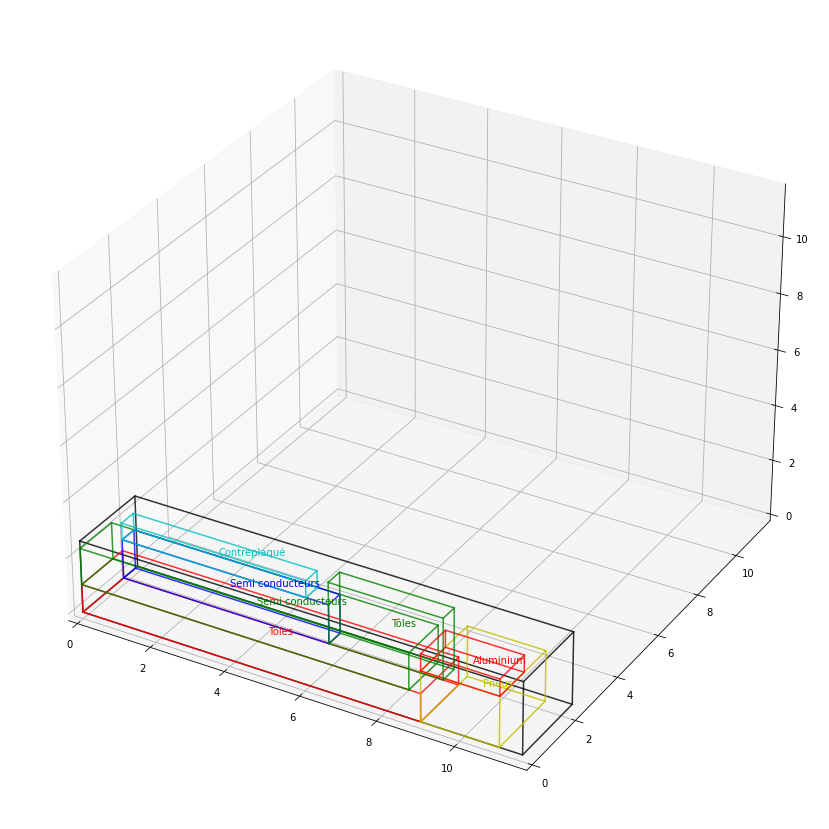

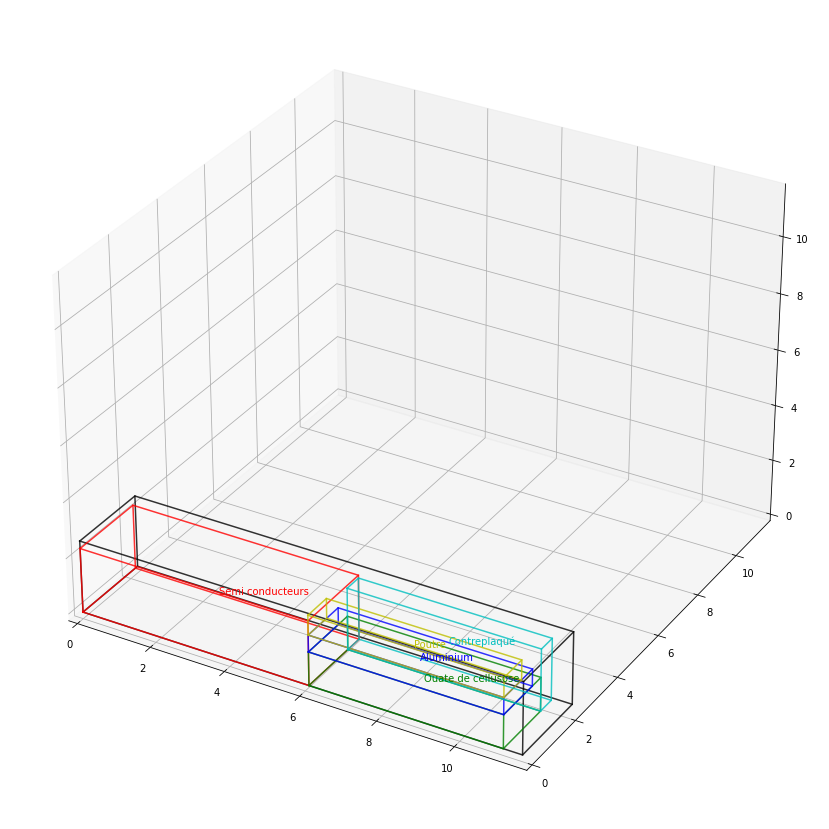

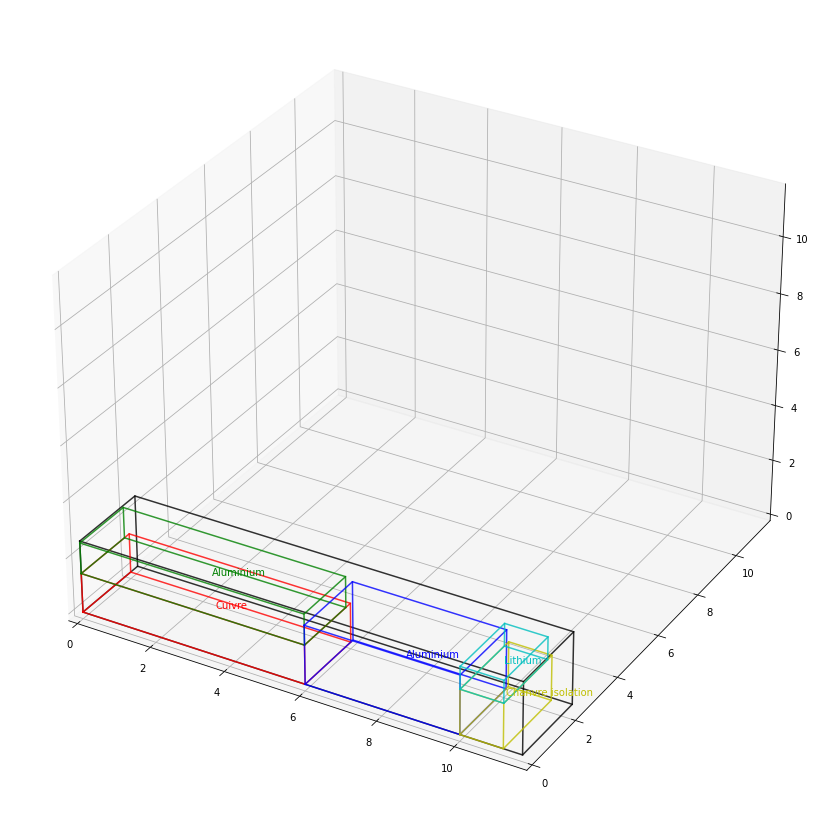

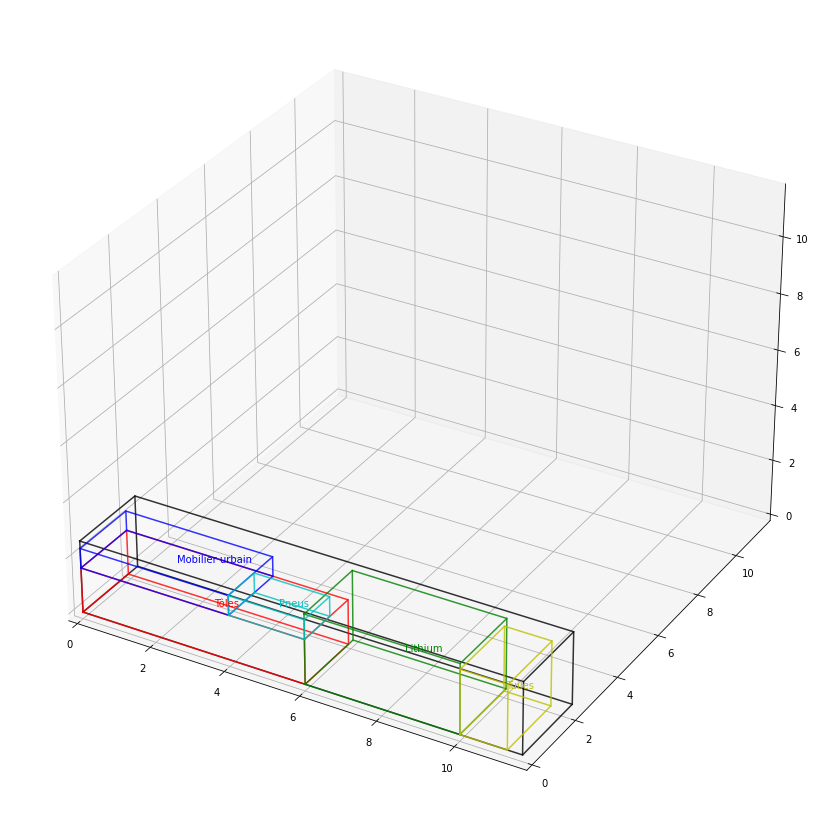

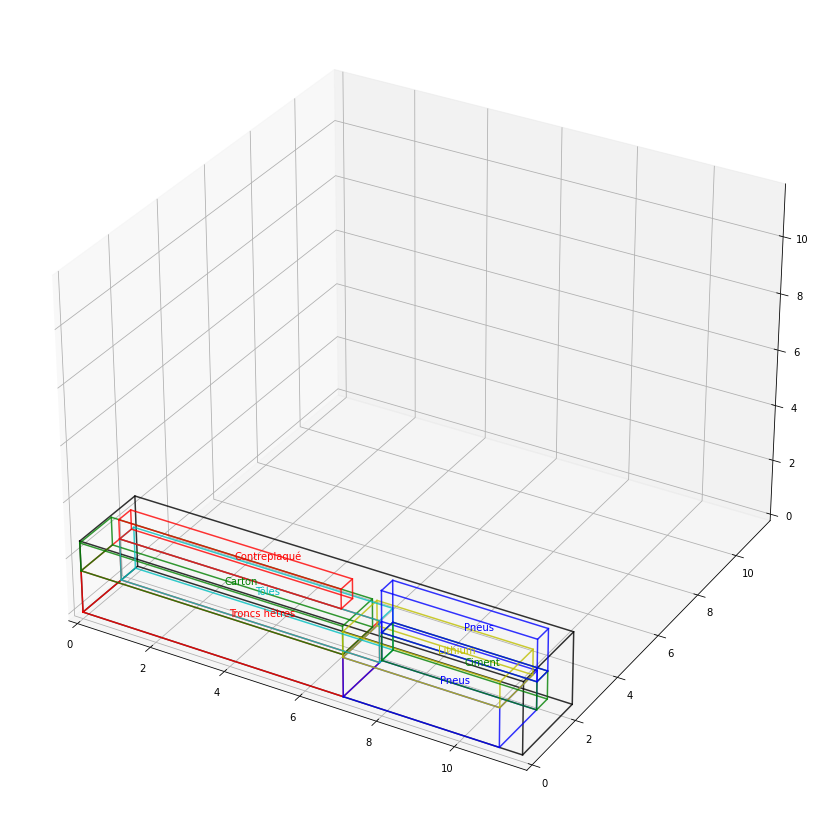

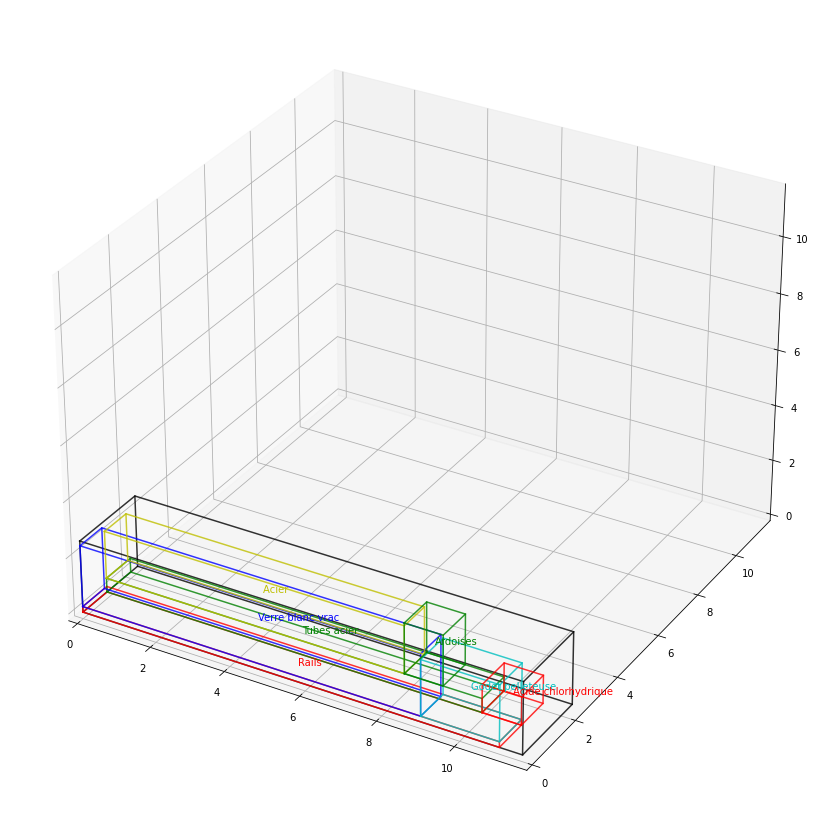

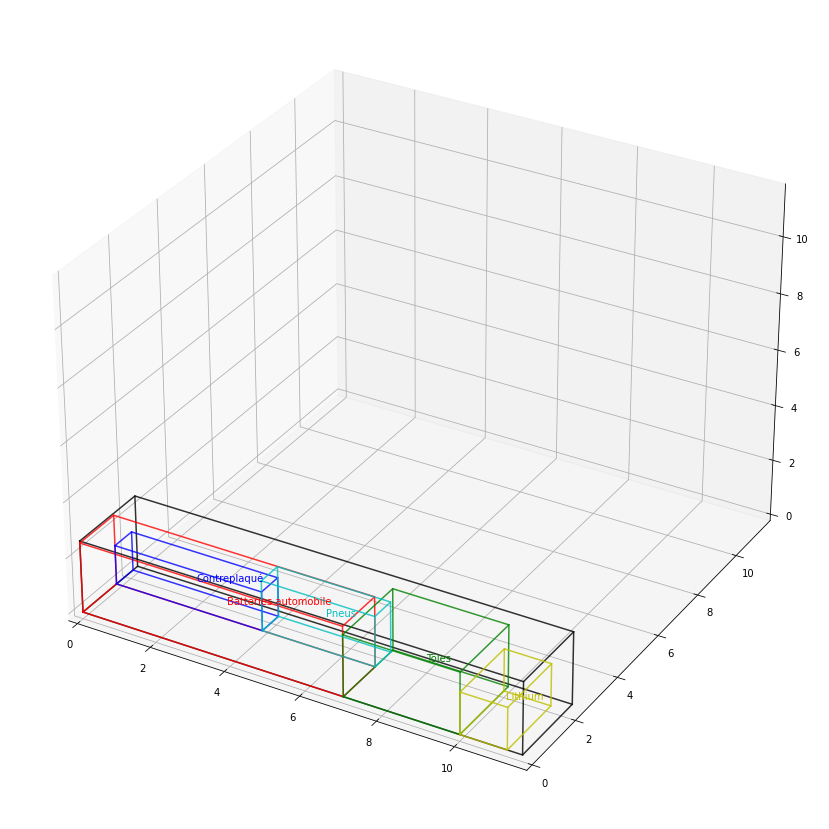

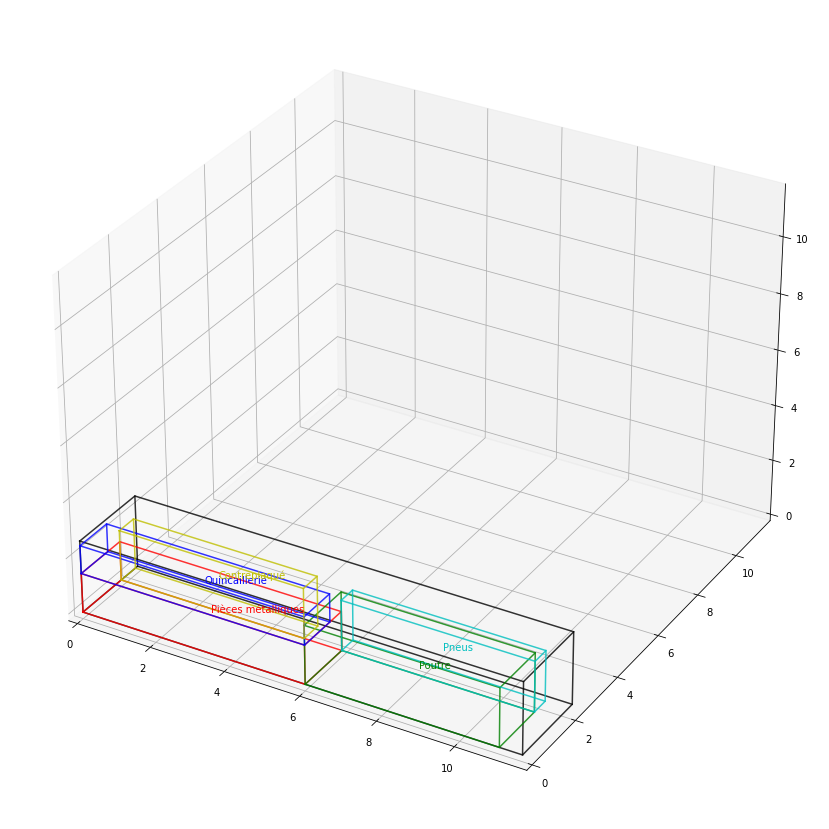

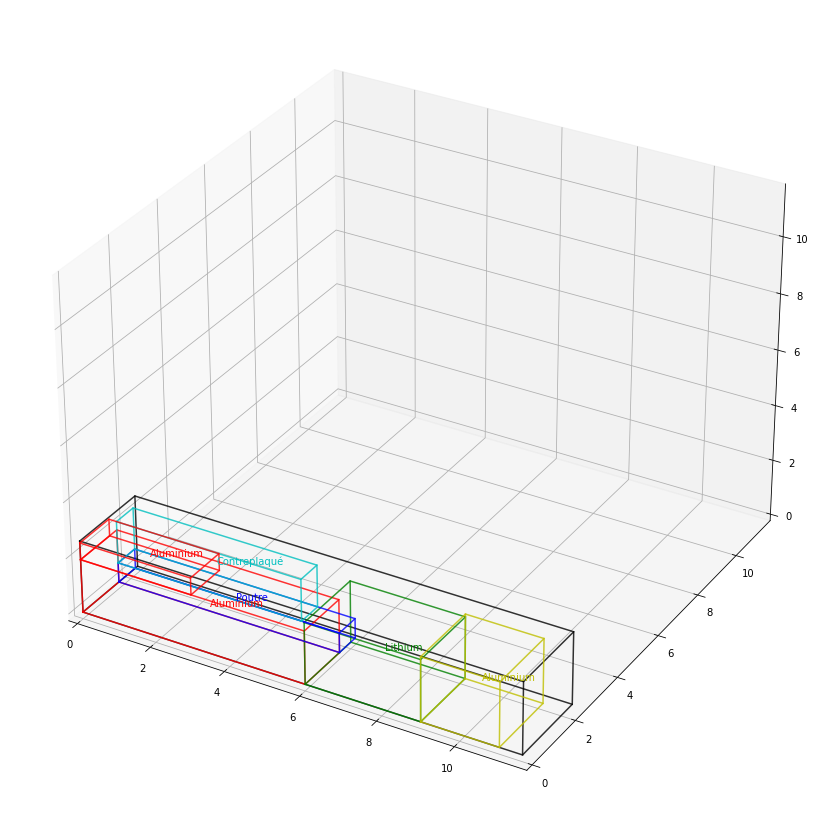

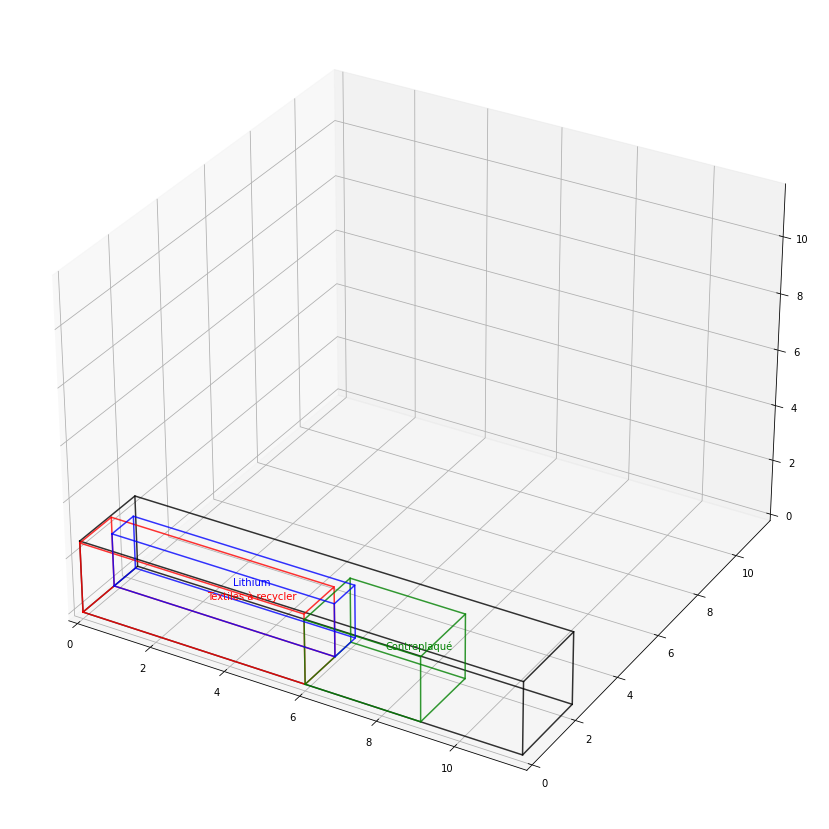

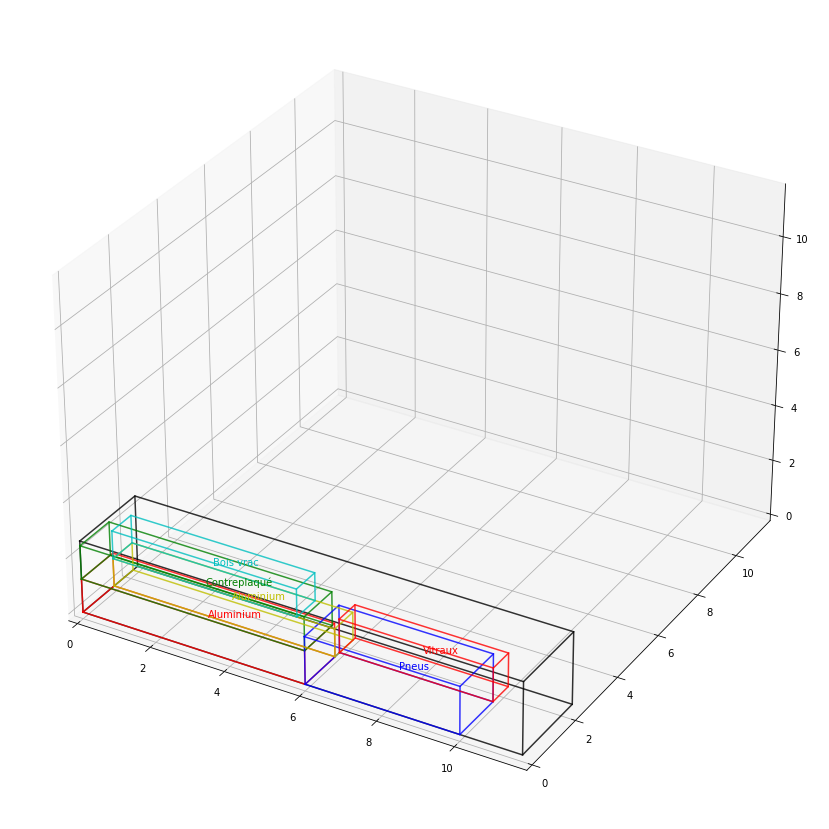

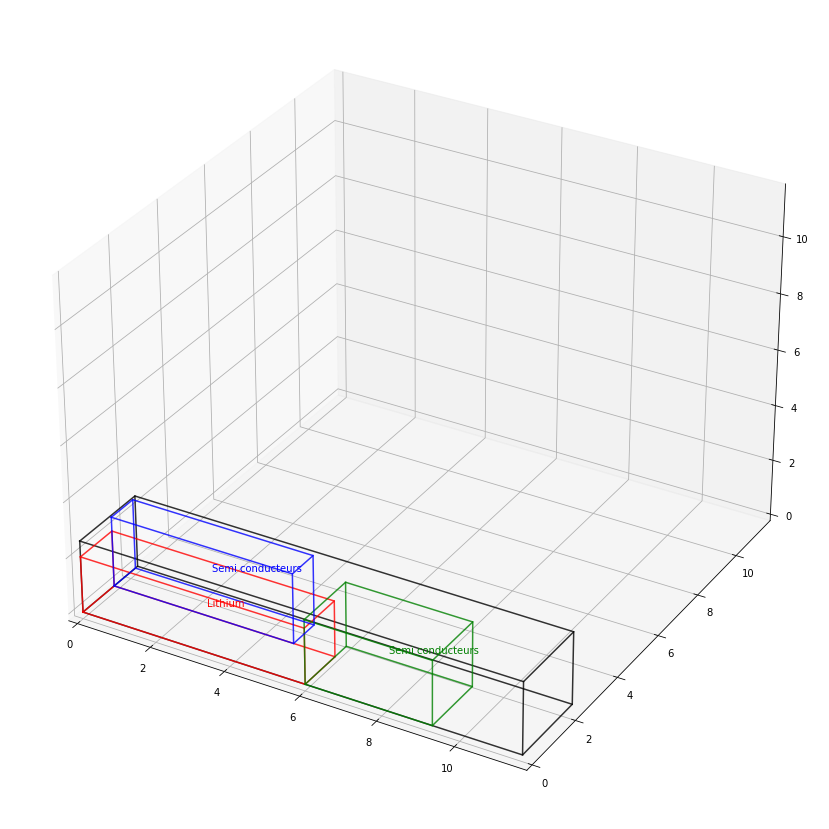

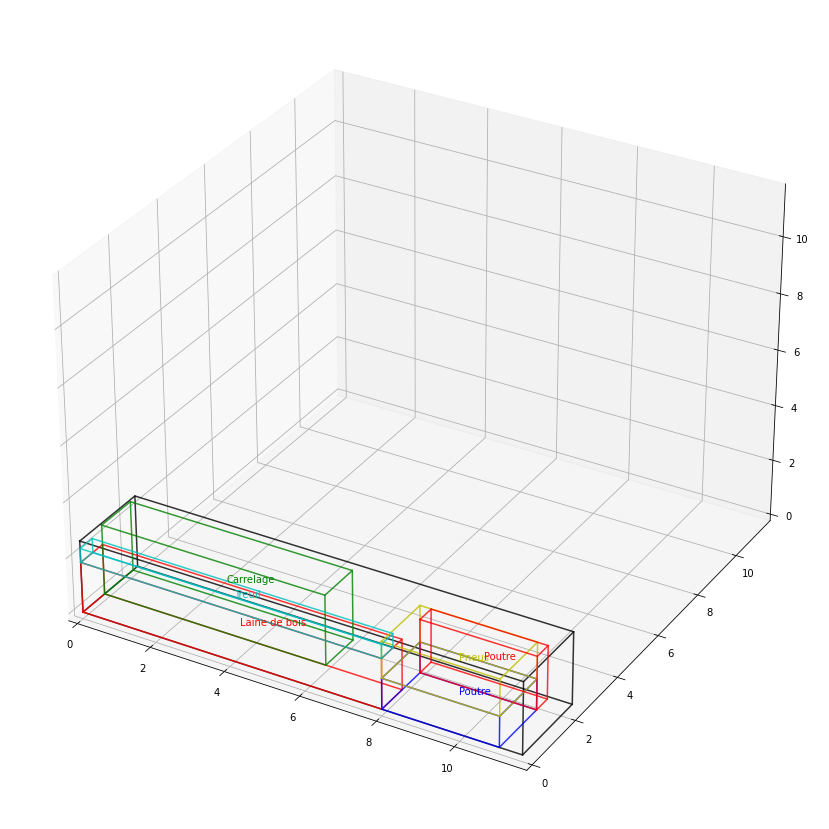

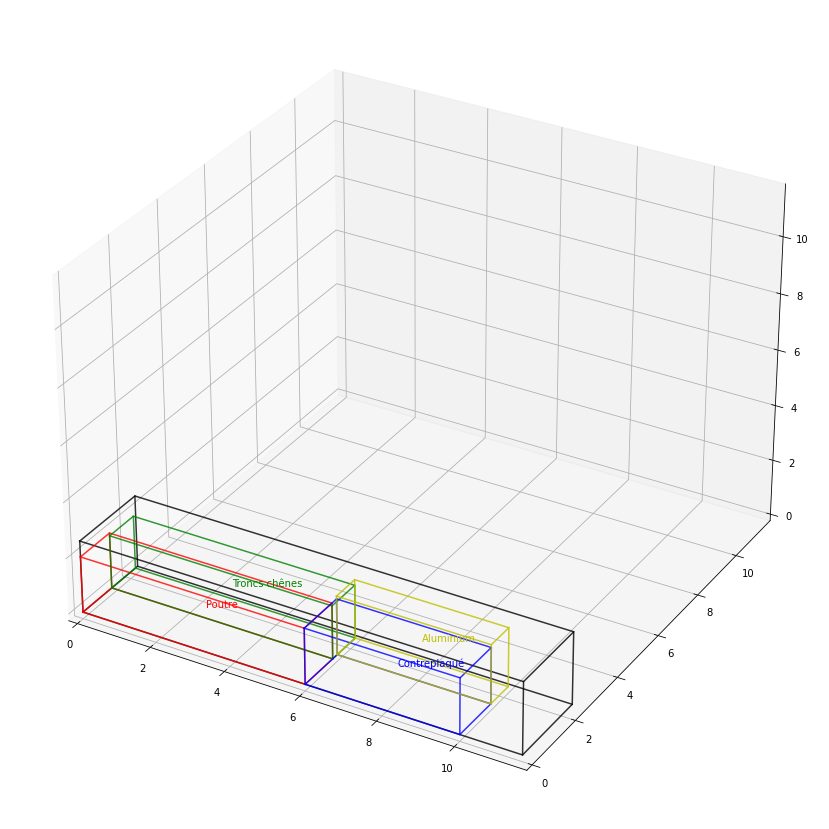

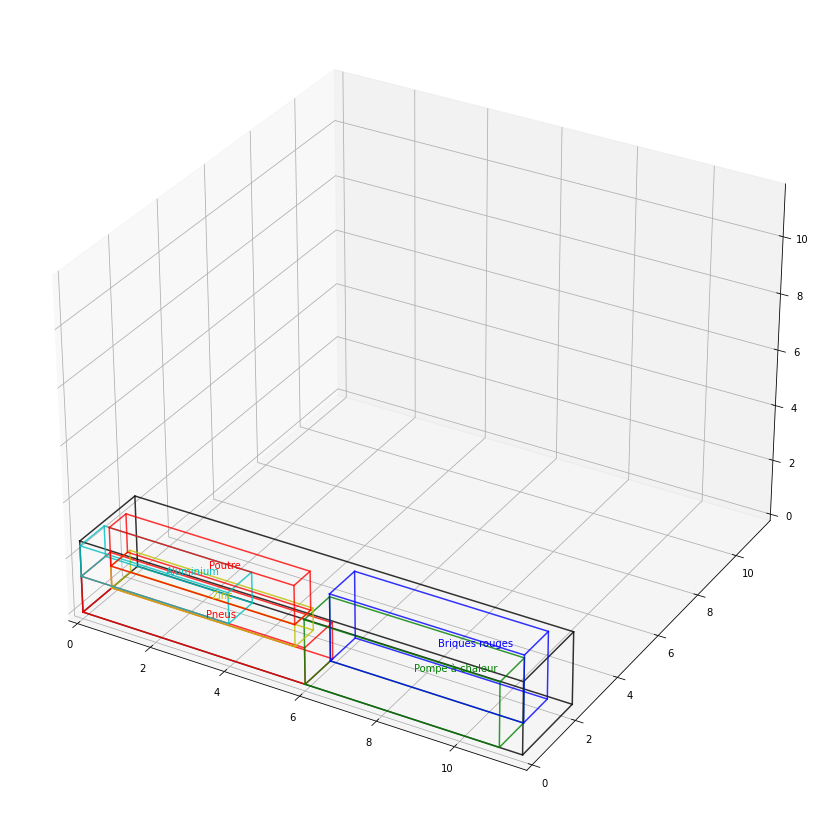

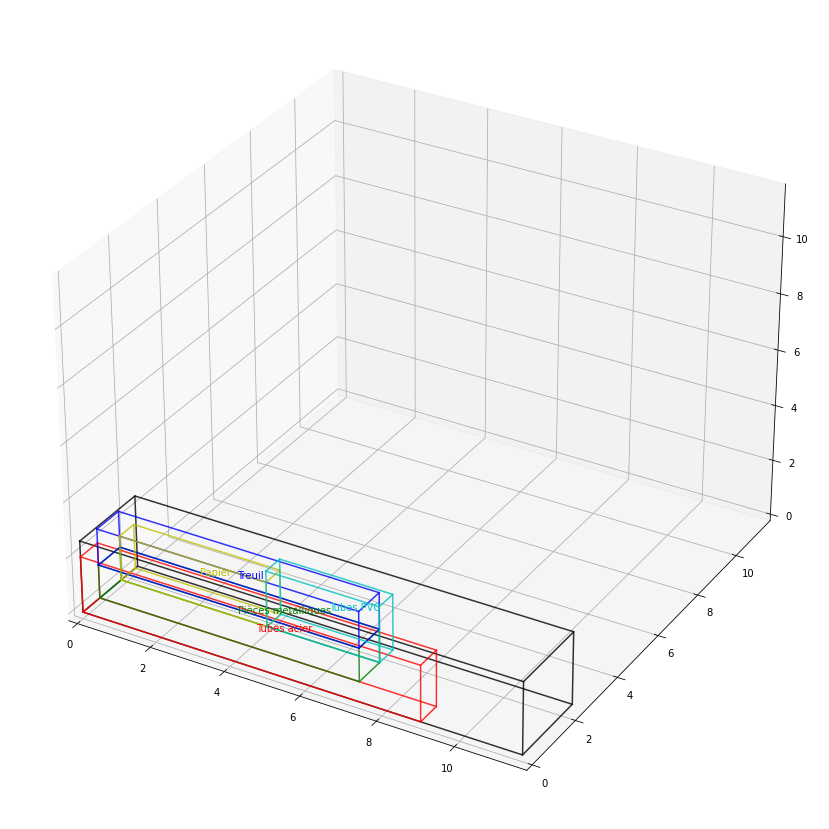

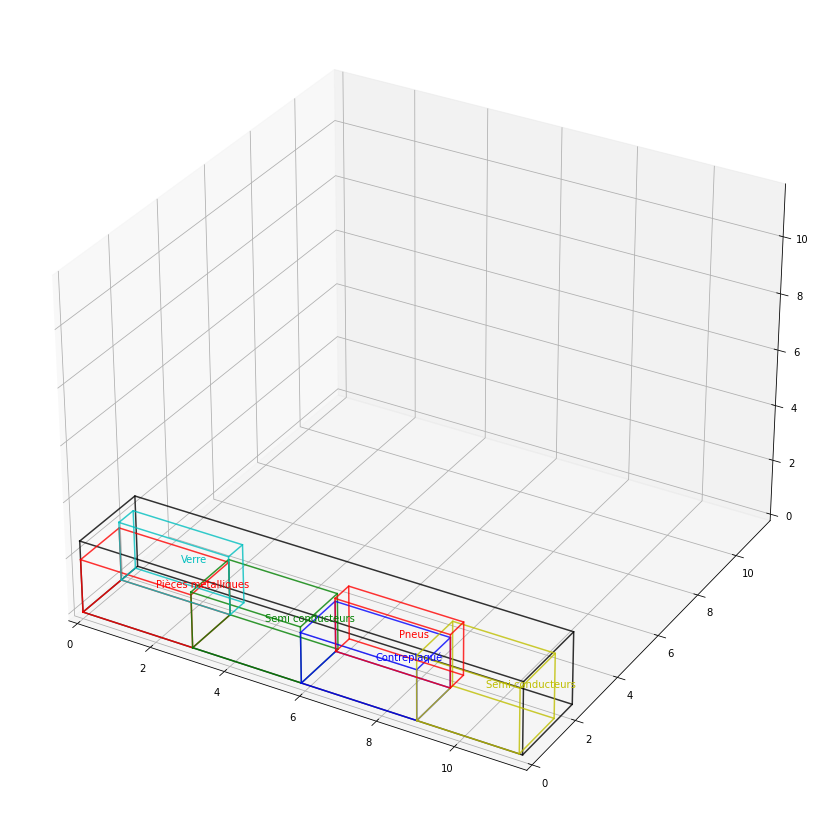

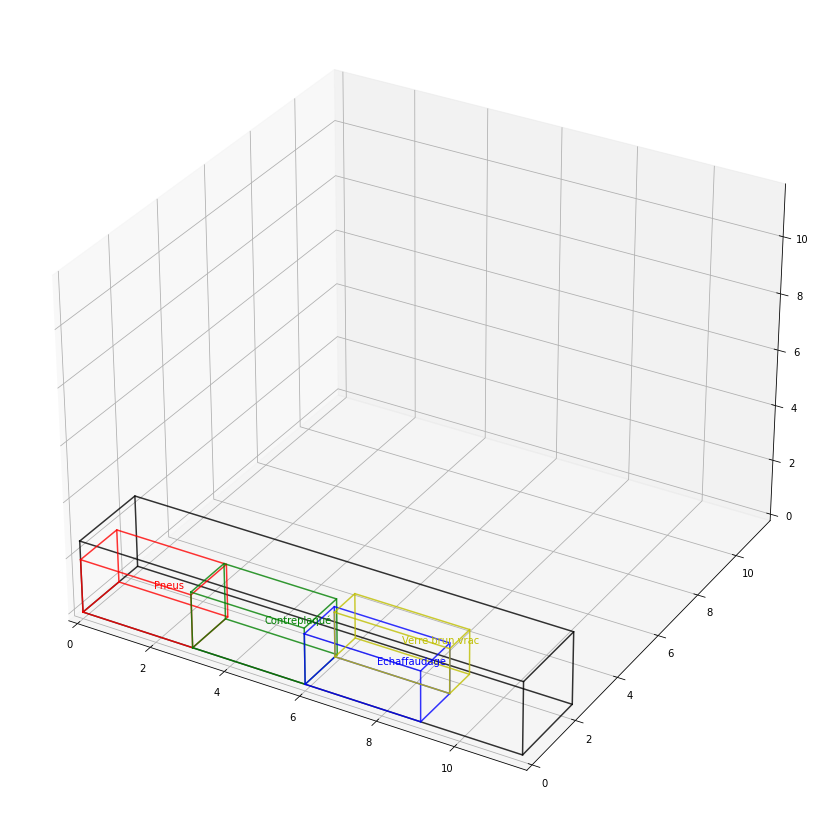

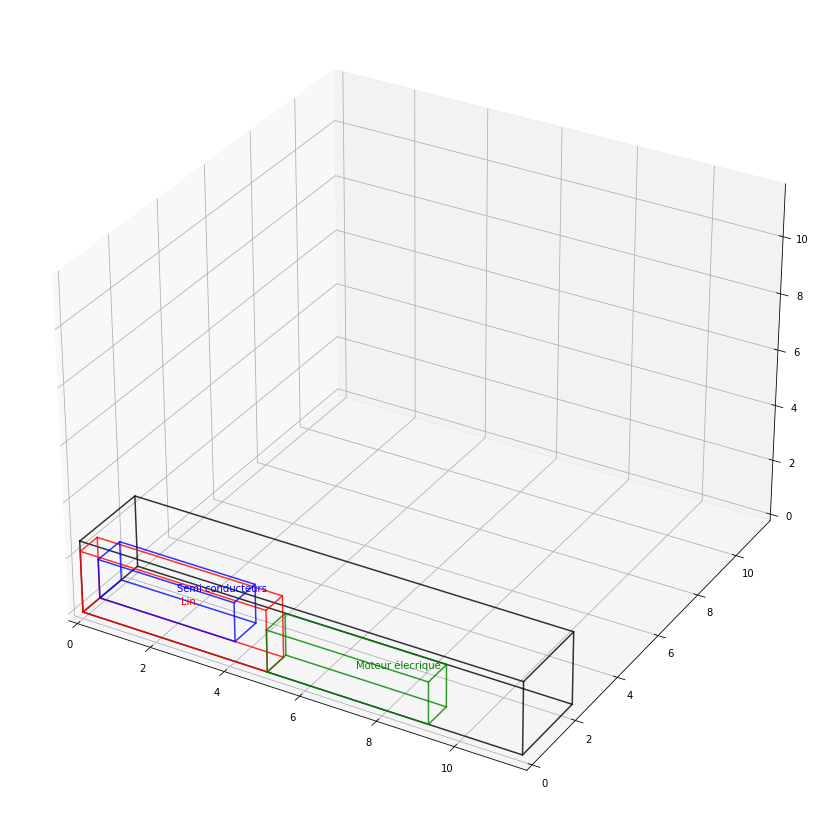

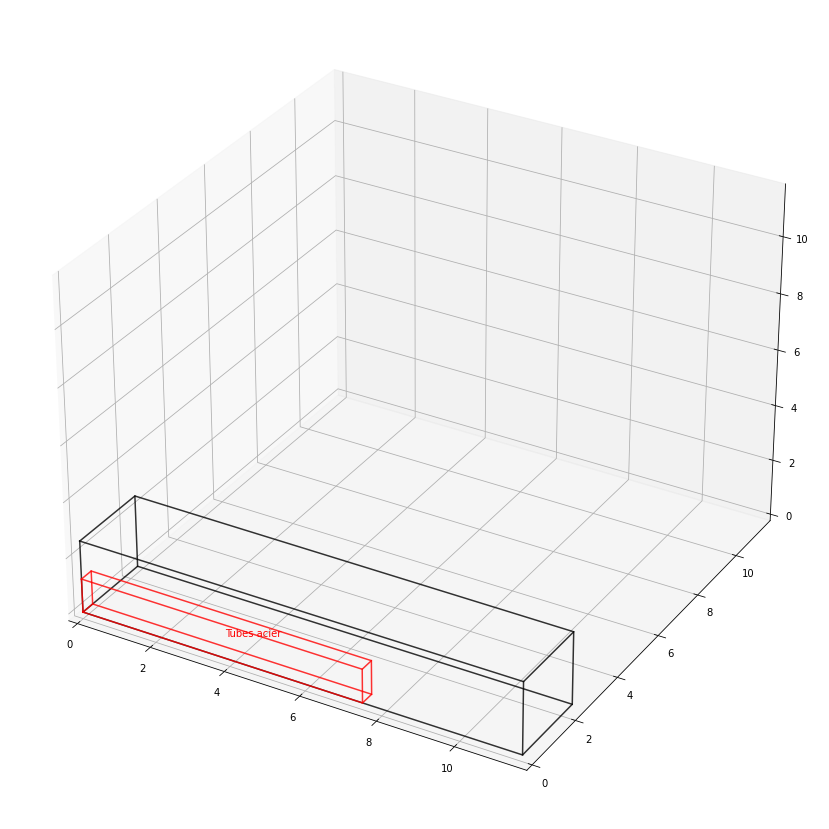

In [41]:
conteneurs = bin_packing_Offline(objets)
for conteneur in conteneurs:
    plot_3d(conteneur)

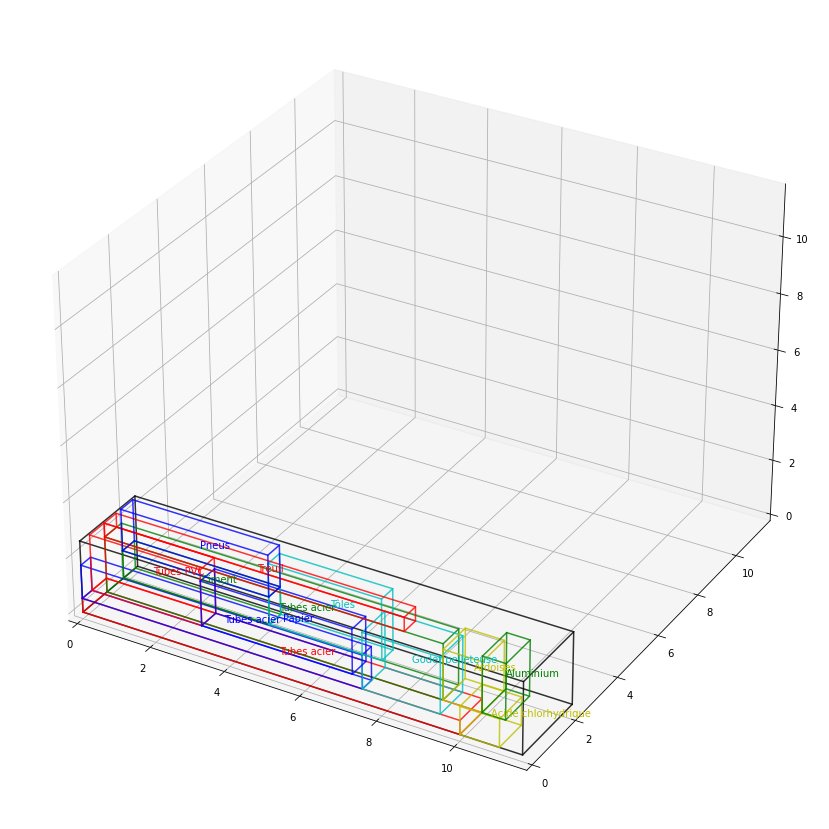

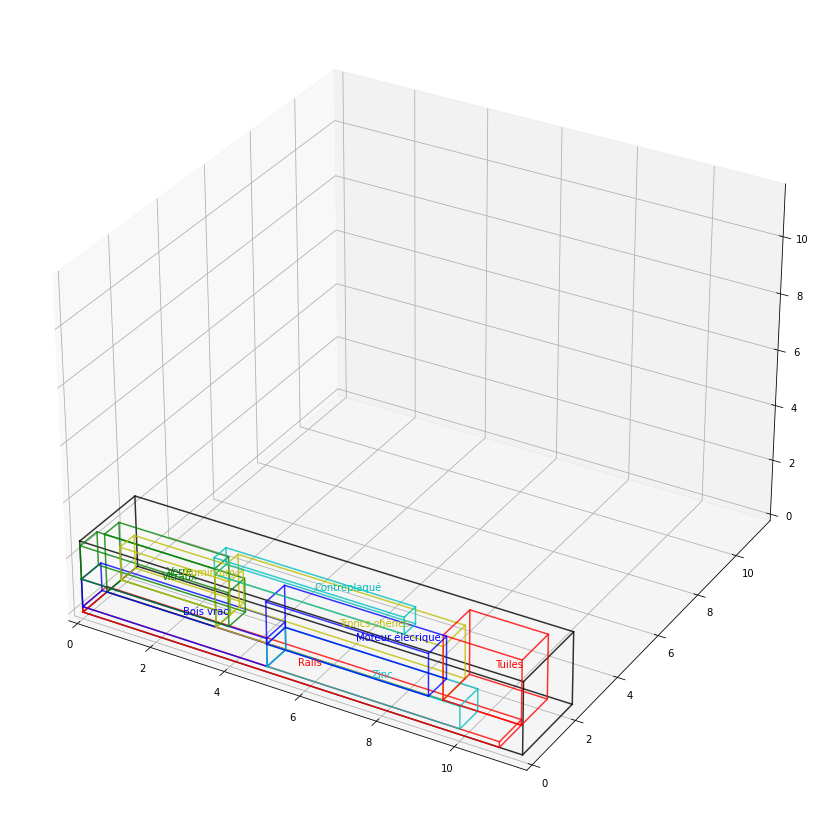

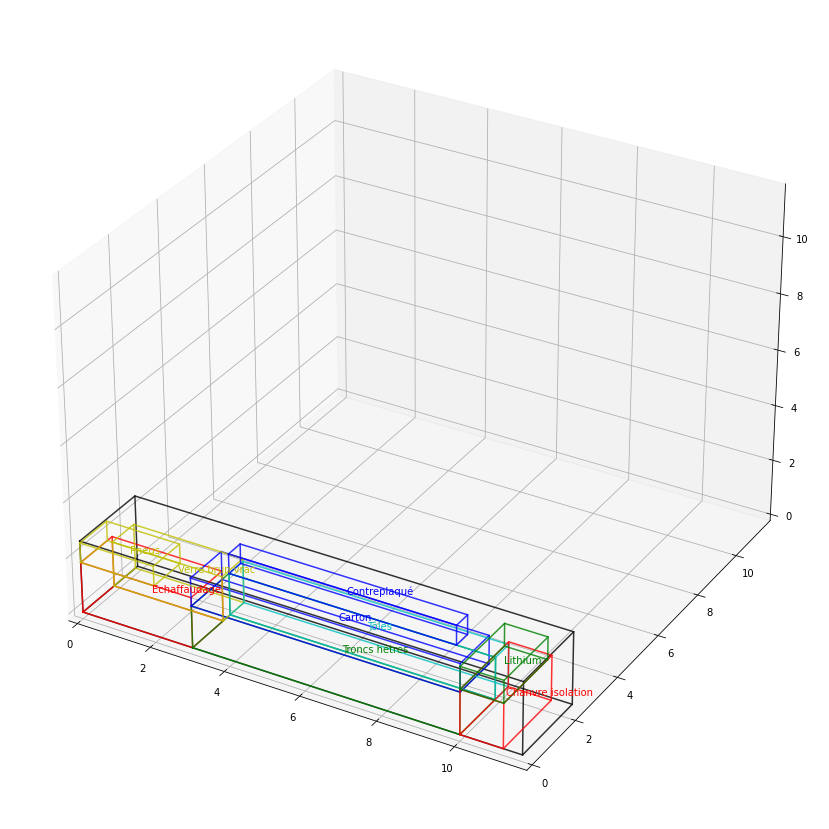

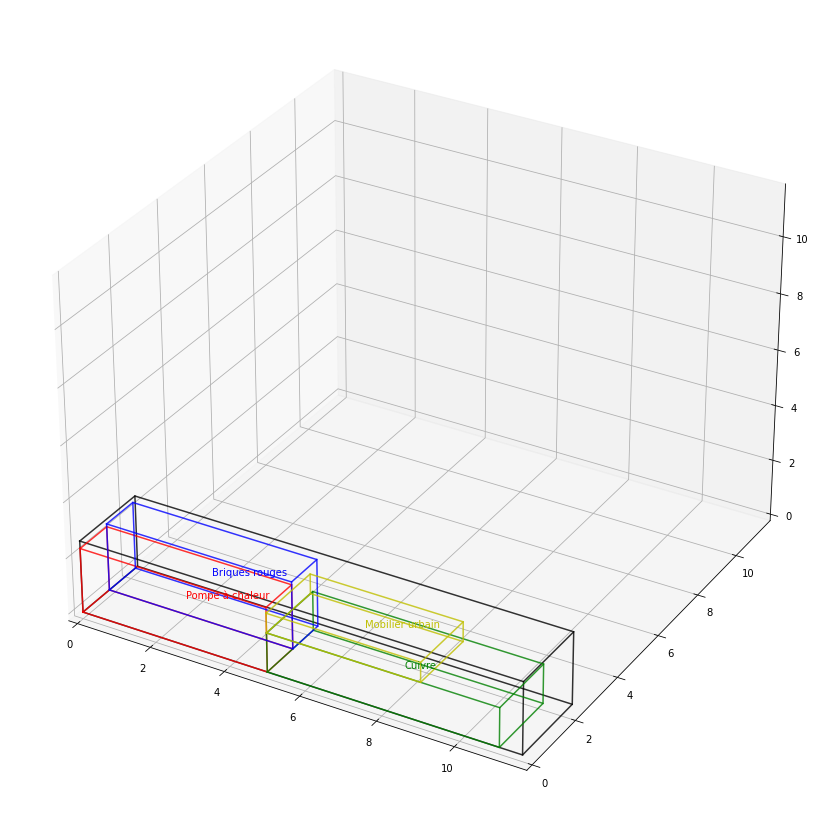

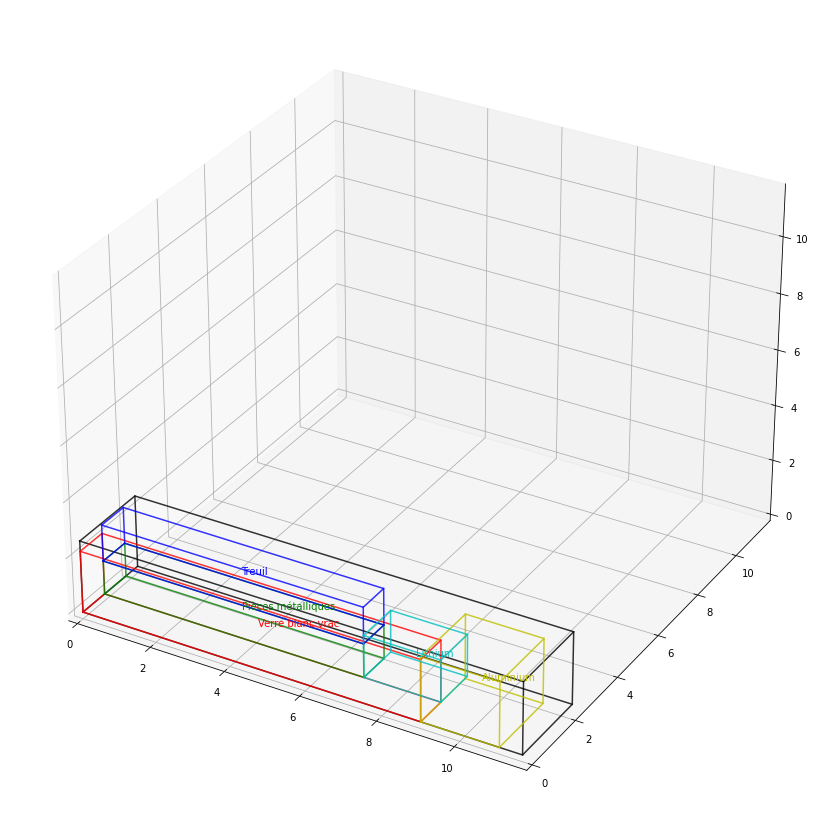

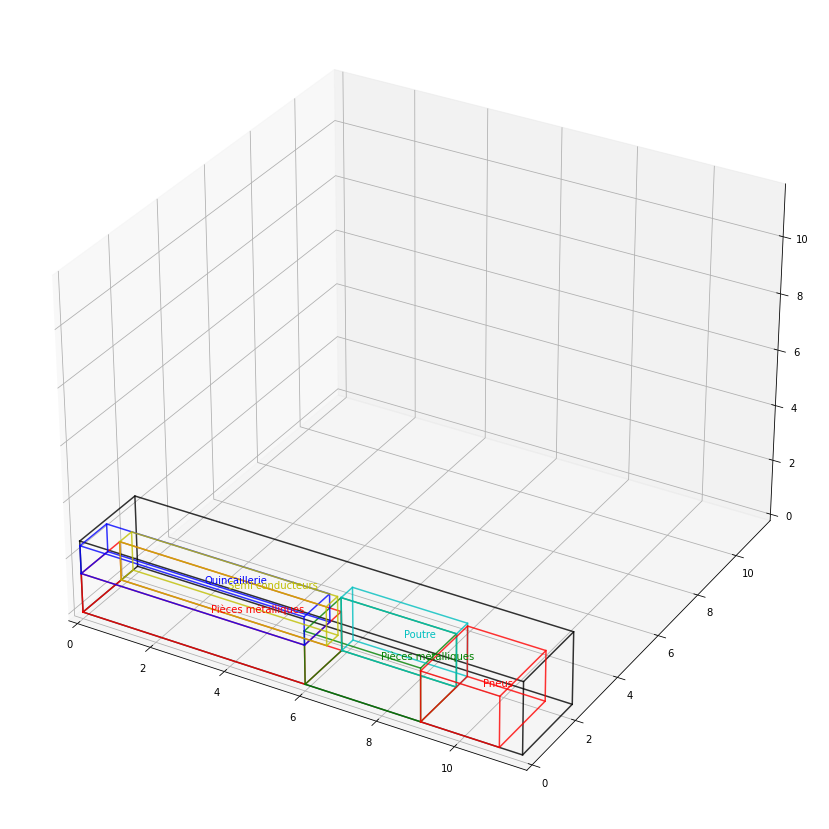

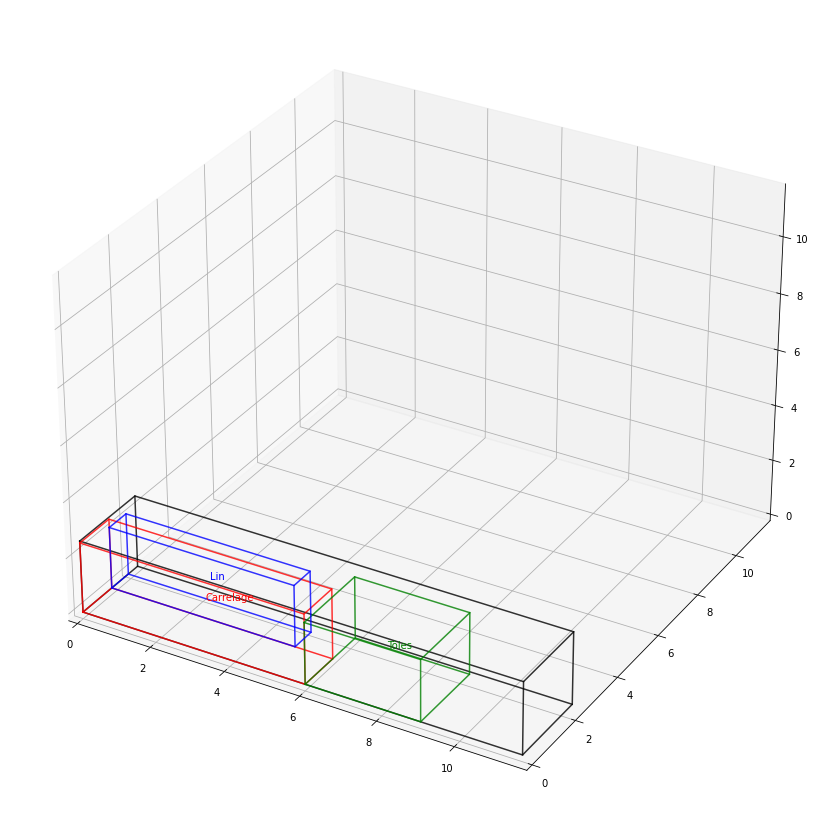

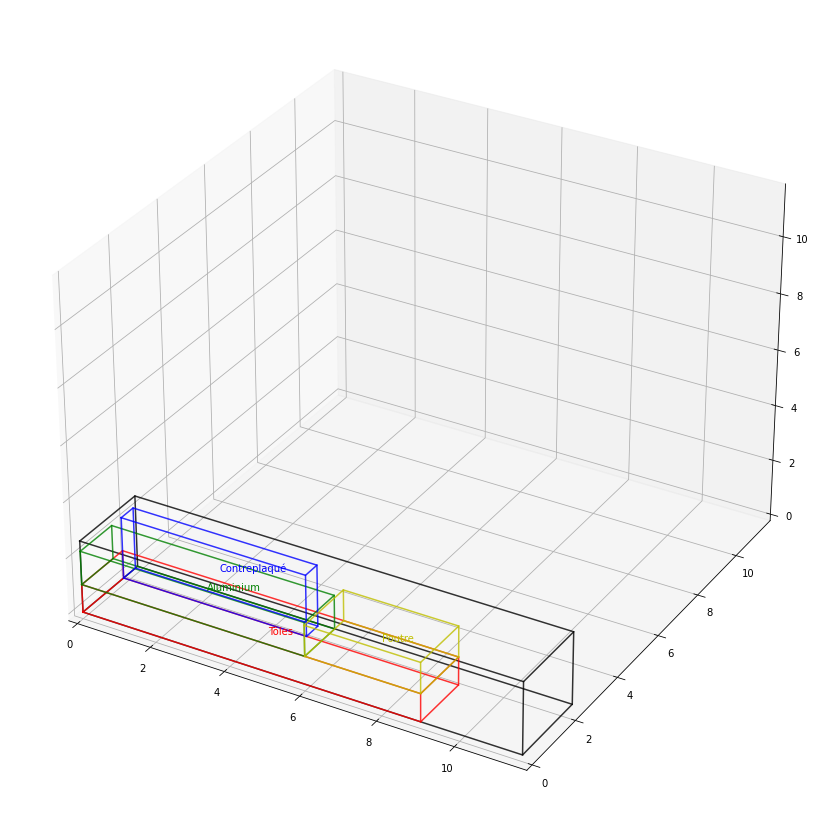

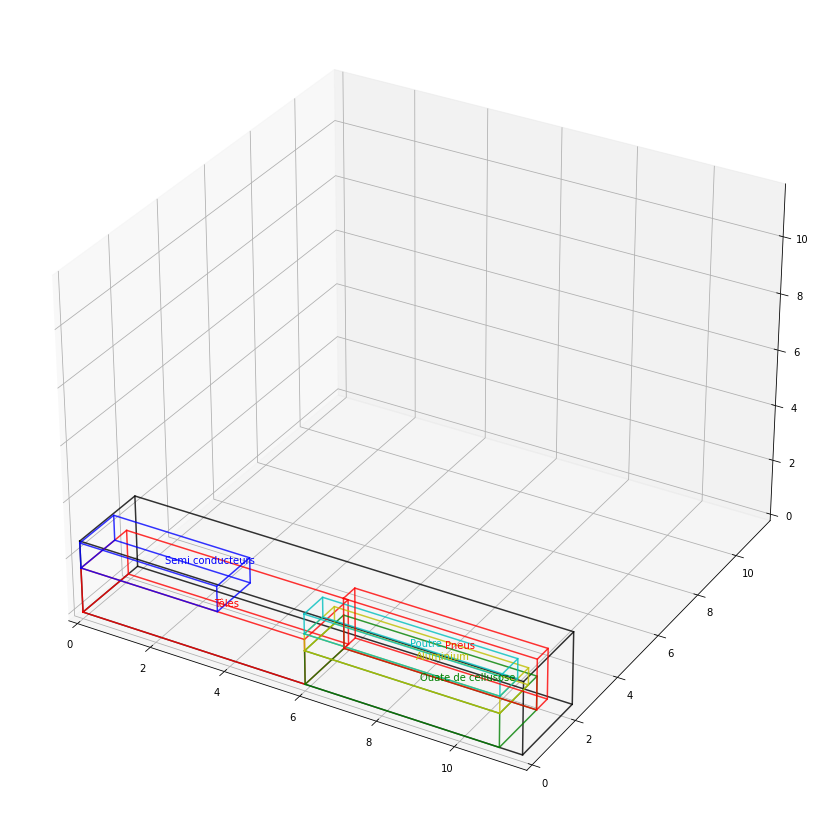

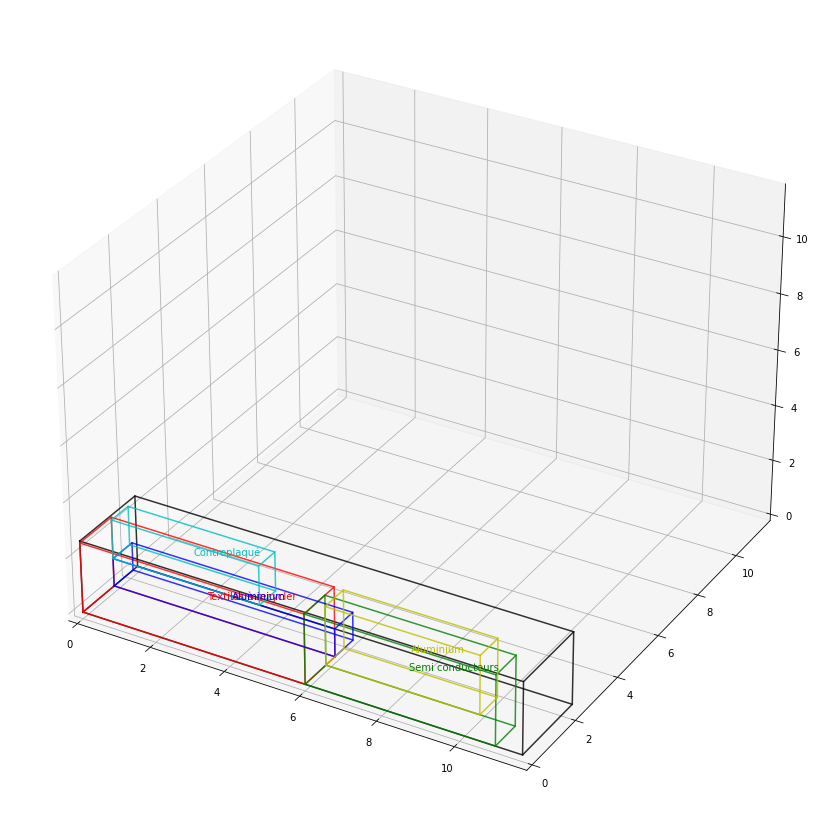

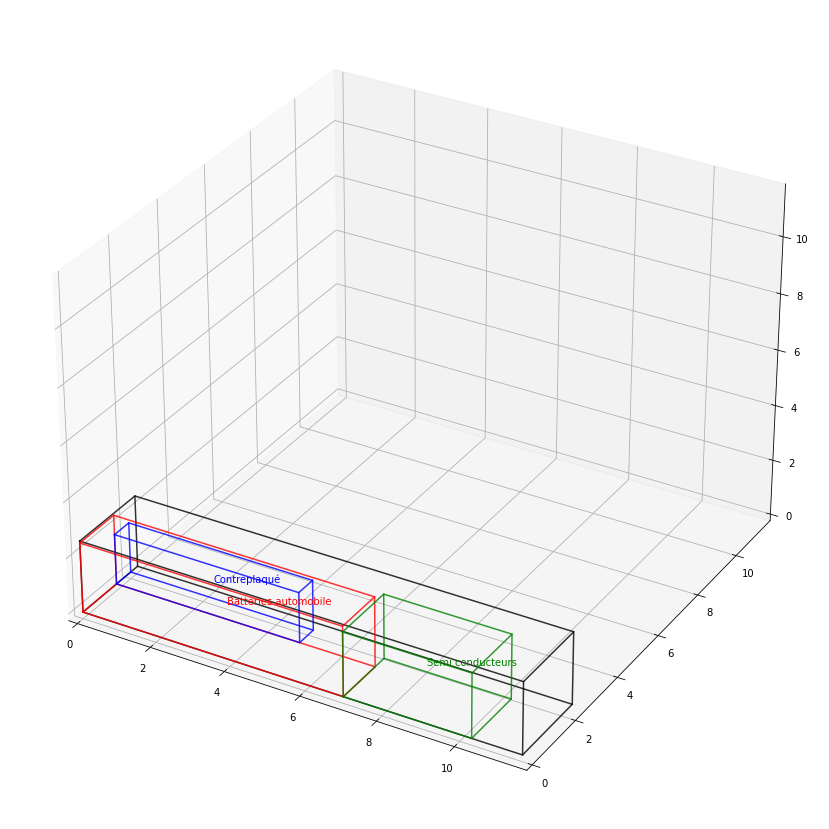

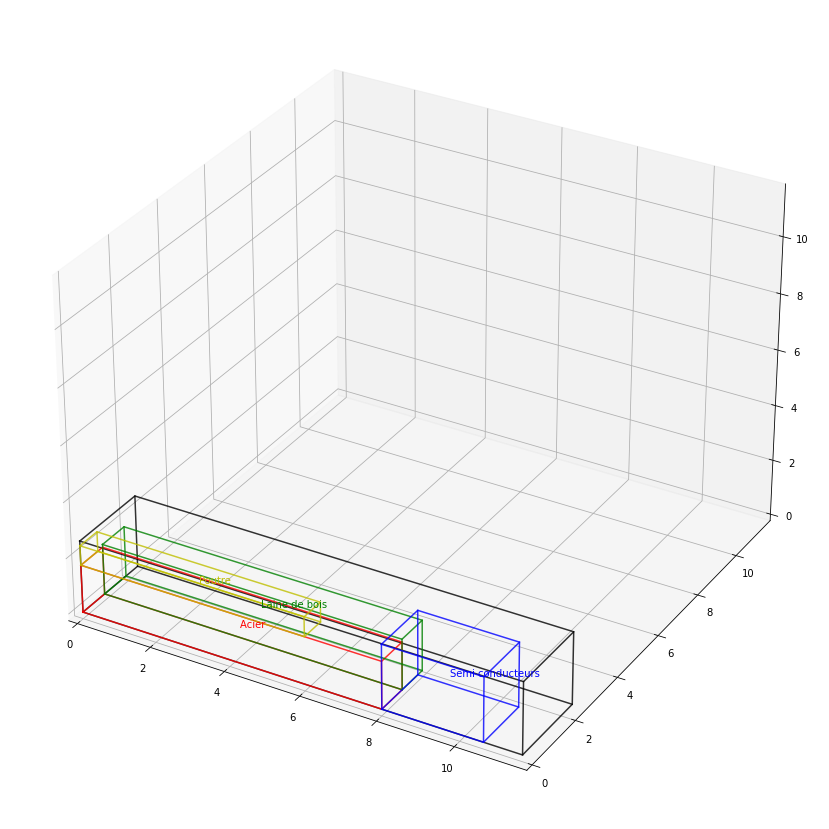

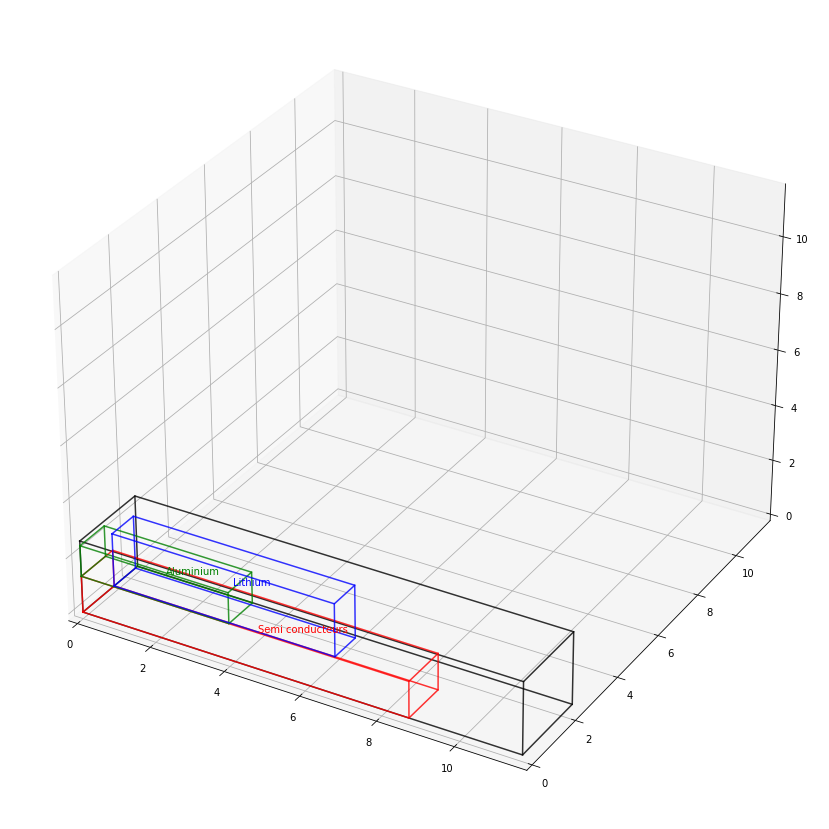

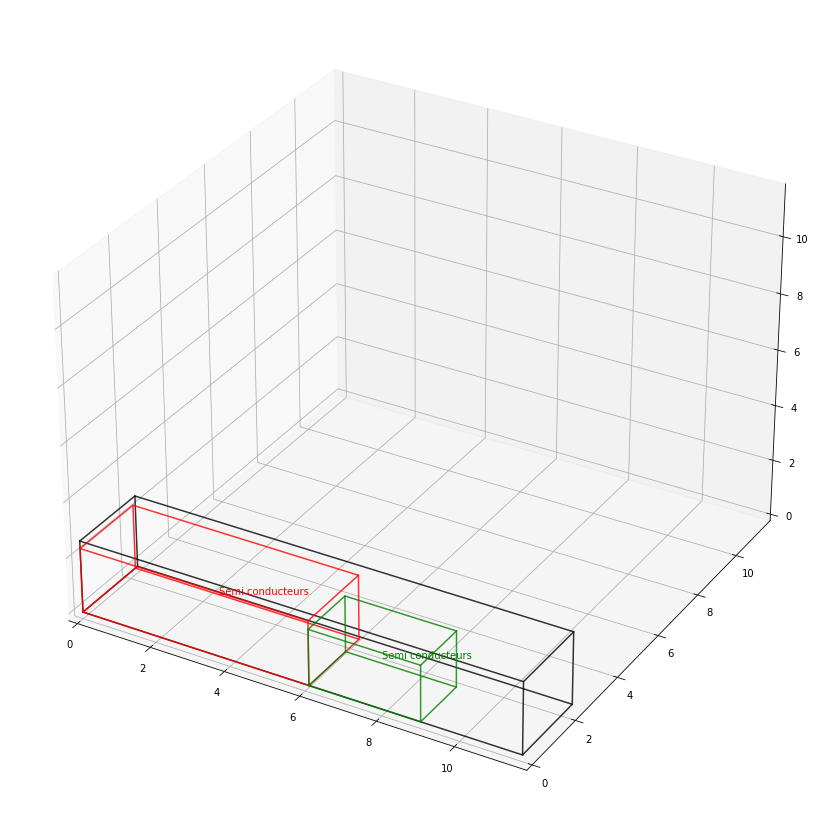

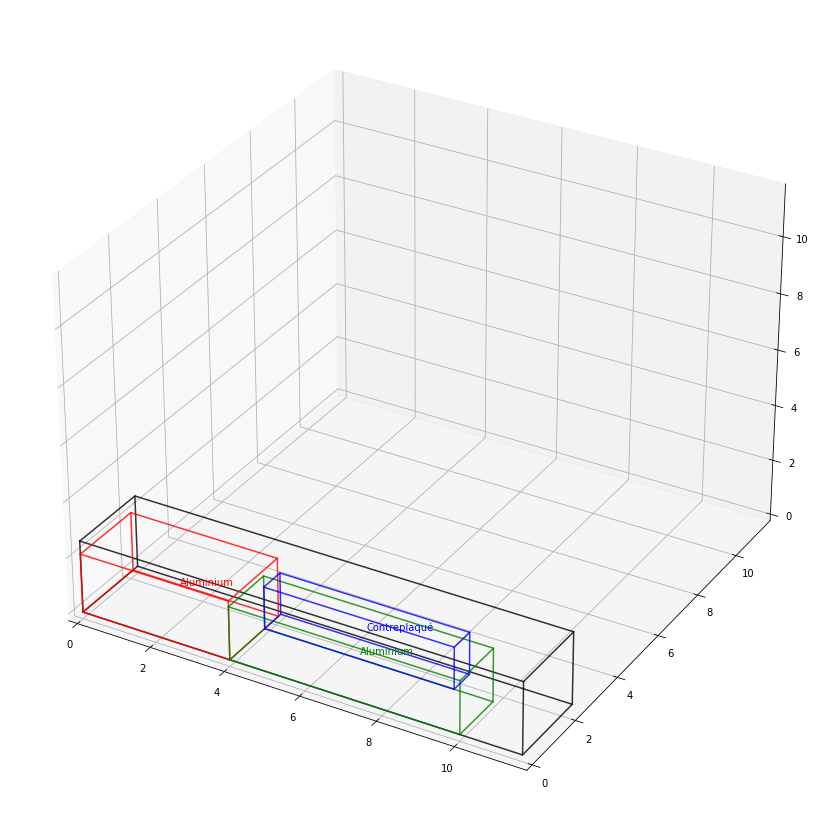

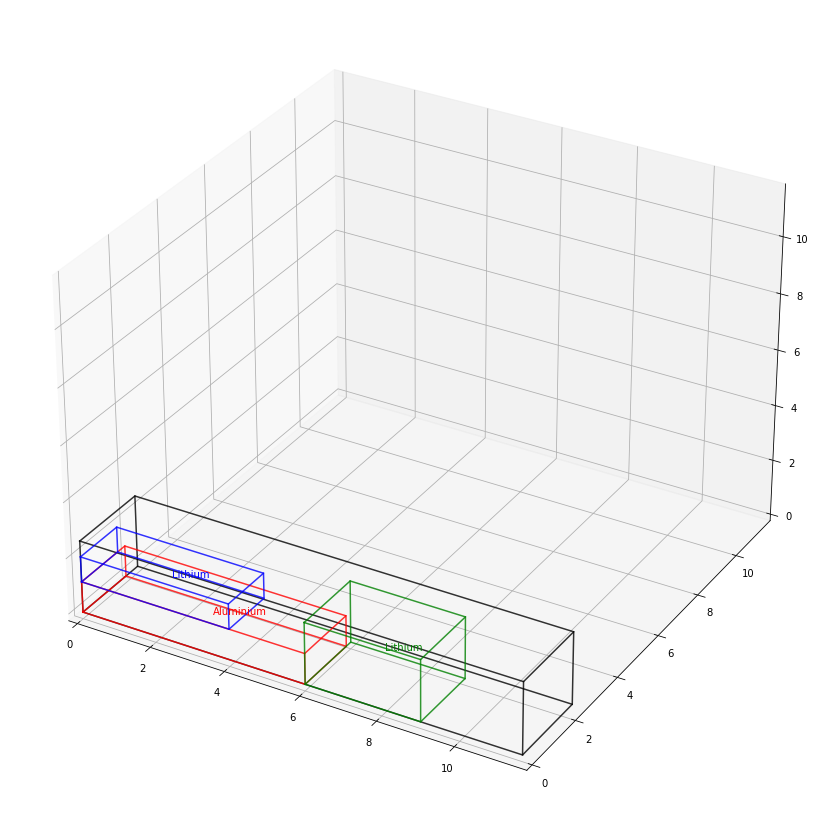

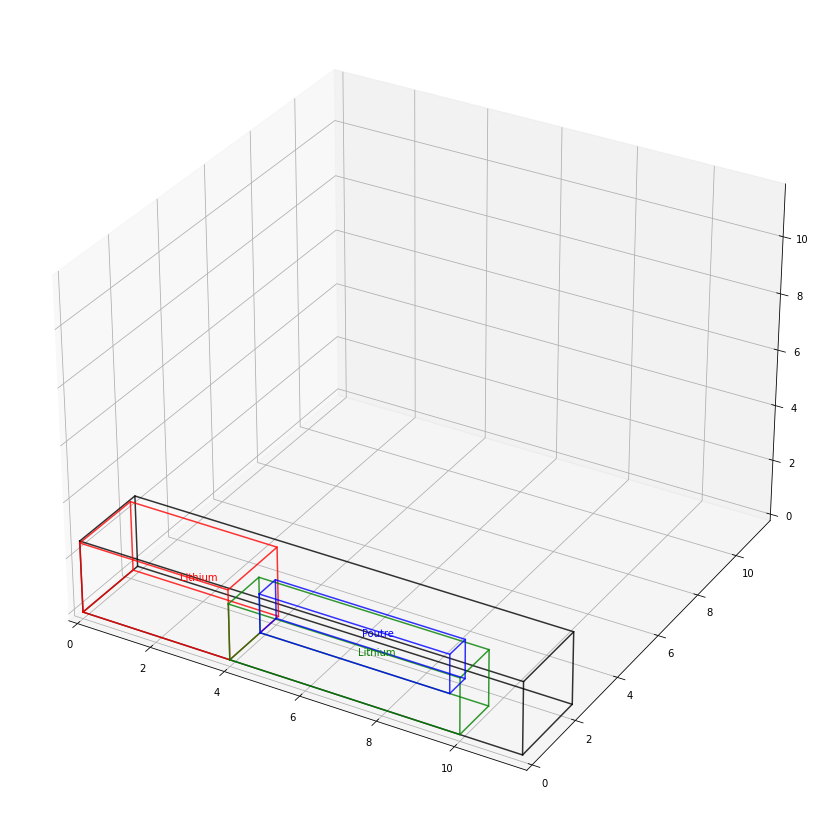

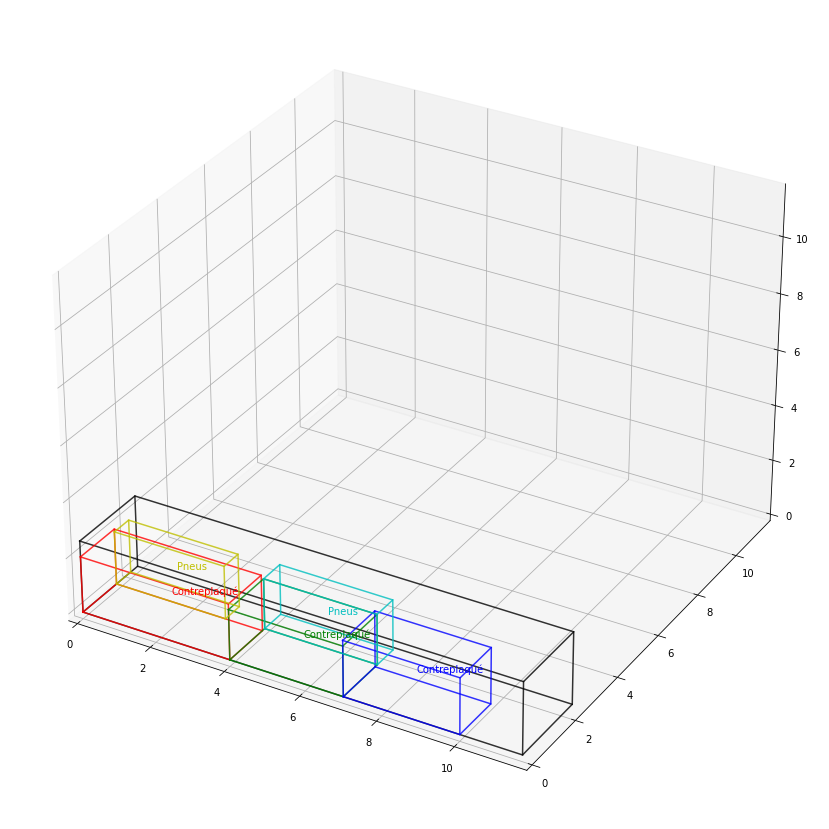

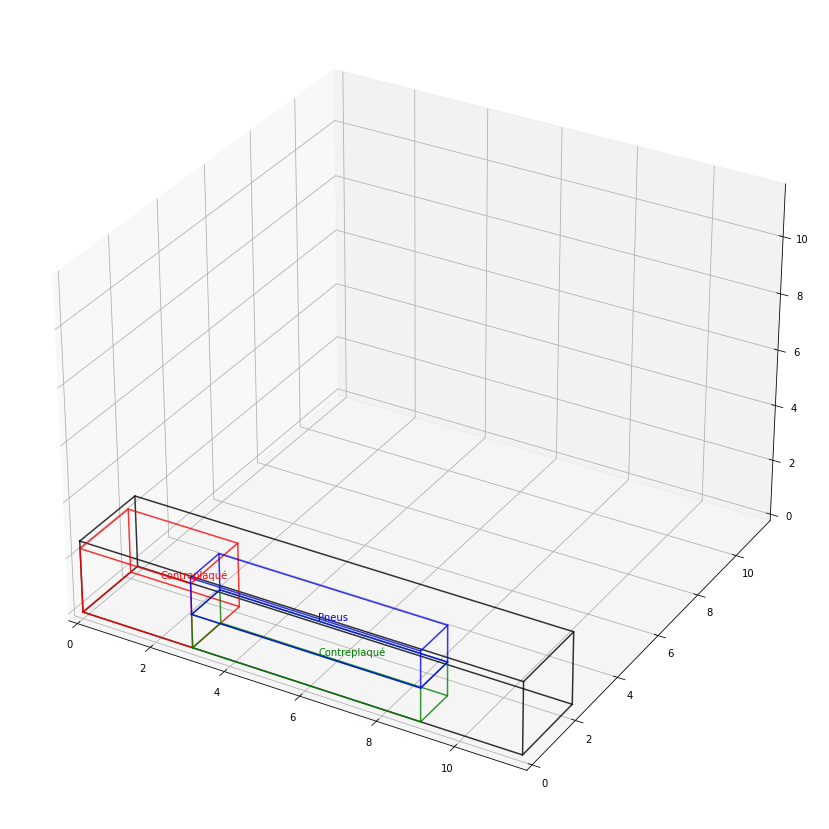

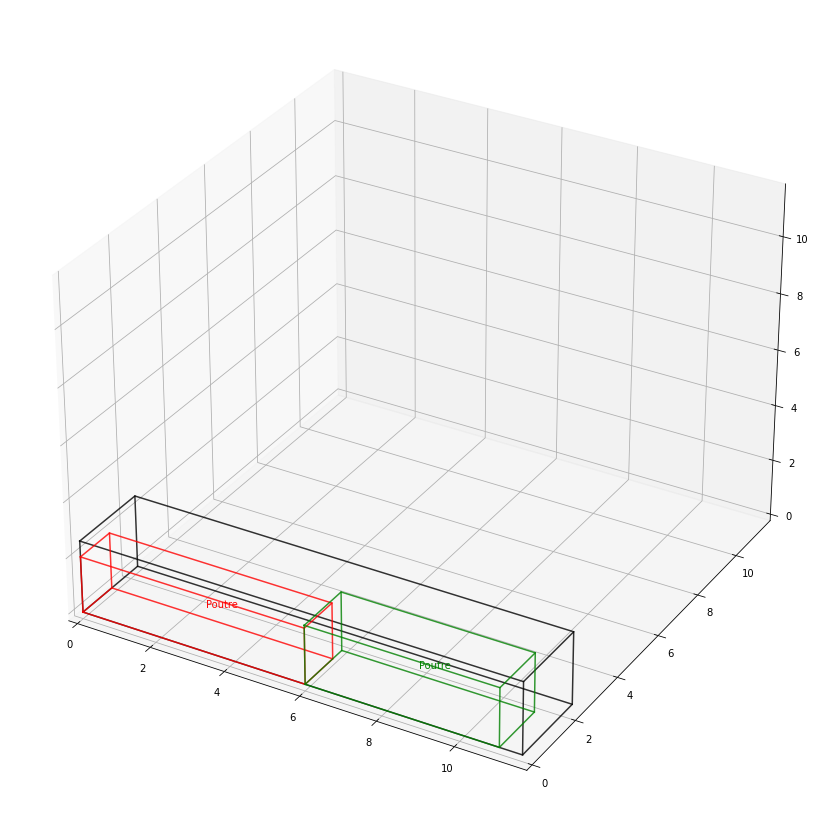

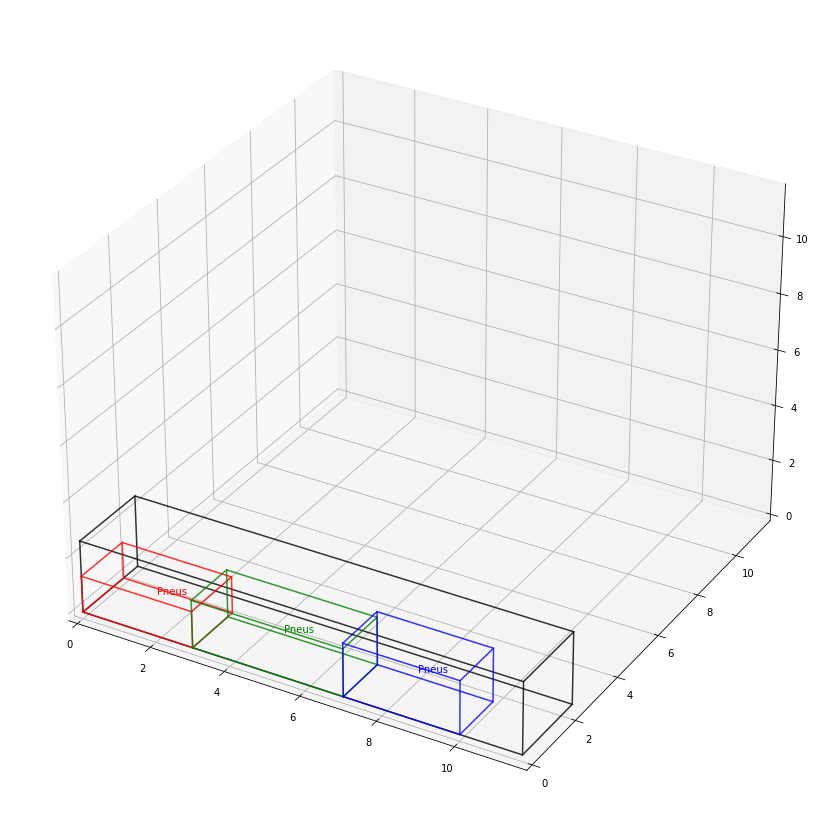

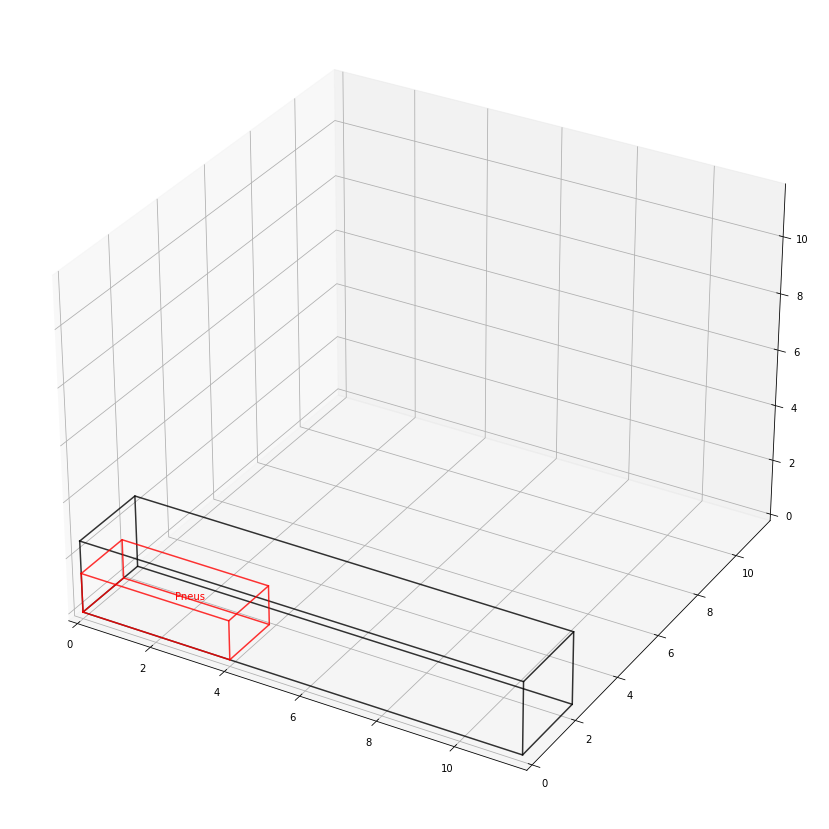

In [42]:
conteneurs = bin_packing_Online(objets)
for conteneur in conteneurs:
    plot_3d(conteneur)